# Analisis de la Penetracion de Internet Fijo en bogota para el 2024 y 2025

# Definición

## INTRODUCCION

El objetivo de este proyecto es analizar la penetración de internet fijo en diversas regiones de Colombia utilizando el conjunto de datos de Penetración de Internet Fijo de 2015 a 2023. Los datos incluyen campos como departamentos, municipios, número de accesos a internet fijo, estimaciones de población (DANE) e índices calculados. Nos centraremos en entender las tendencias, las disparidades regionales y las proyecciones futuras, en particular para Bogotá, en los años 2024 y 2025.

[Video Explicativo de Youtube](https://youtu.be/bVcpjnD85VA)

## Descripcion del problema

El principal problema es predecir el crecimiento de los accesos a internet fijo en Bogotá para los años 2024 y 2025. El conjunto de datos proporciona datos históricos que nos ayudarán a identificar patrones de crecimiento de la penetración de internet y a predecir cómo podría cambiar en el futuro. El desafío es utilizar las tendencias históricas, posiblemente combinadas con factores externos como el crecimiento de la población y el desarrollo de la infraestructura tecnológica, para hacer predicciones fiables.

[Internet Fijo Penetración Departamentos
](https://www.datos.gov.co/Ciencia-Tecnolog-a-e-Innovaci-n/Internet-Fijo-Penetraci-n-Departamentos/4py7-br84/about_data)

**Número de suscriptores con acceso fijo a Internet** para cada uno de los departamentos de Colombia según los datos reportados por los proveedores al último día de cada trimestre . Basados en estos datos, y en las proyecciones del DANE para la población por departamento, consolidado 2015-4T al 2015 4T, se muestra el porcentaje de penetración de Internet fijo para cada trimestre.

Última Actualización
17 de septiembre de 2024

Datos suministrados por
Ministerio de Tecnologías de la Información y las Comunicaciones


---



##  Pasos para el análisis de los datos

**Limpieza de datos:** Verificar que no haya valores nulos o erróneos, especialmente en las columnas de año, trimestre, accesos a internet y población.

**Análisis exploratorio de datos (EDA):** Observar las tendencias a lo largo del tiempo para distintos departamentos y municipios, analizando cómo ha evolucionado el índice de penetración de internet.

**Filtrado de datos:** Extraer específicamente los datos de Bogotá para centrarnos en la predicción para esta ciudad.

**Análisis de tendencias:** Visualizar el crecimiento de los accesos a internet fijo en Bogotá en el período 2022-2023.

**Análisis de correlación:** Evaluar cómo los accesos a internet fijo están relacionados con el tamaño de la población y otros factores relevantes.

## Enfoque para la predicción 2024-2025

 La predicción del crecimiento de los accesos a internet fijo en Bogotá se llevará a cabo utilizando redes neuronales. Las redes neuronales permiten capturar patrones complejos en los datos, lo cual es ideal para identificar tendencias y prever el crecimiento a largo plazo. El enfoque detallado es el siguiente:



*   **Preparación de los datos:** Extraer y transformar los datos históricos de Bogotá, y calcular la tasa de crecimiento anual de los accesos a internet fijo.
*   **Entrenamiento del modelo:** Entrenar una red neuronal utilizando los datos históricos, para que el modelo aprenda a capturar la tendencia en el.
*  **Predicciones:** Utilizar la red neuronal entrenada para proyectar el crecimiento de los accesos a internet fijo en Bogotá para los años 2024 y 2025.



---








## Técnicas de análisis





*   Redes neuronales: La red neuronal será el modelo principal utilizado para la predicción de accesos a internet fijo, dada su capacidad para manejar relaciones no lineales y patrones complejos en los datos.
*   Análisis de series de tiempo: Si se cuenta con datos de un período más extenso, podríamos complementar la predicción con métodos de series de tiempo, como ARIMA, para contrastar los resultados de la red neuronal.

*  Visualización: Representar gráficamente el crecimiento de los accesos a internet en Bogotá a lo largo del tiempo y proyectar la tendencia para 2024-2025. Comparar visualmente el crecimiento de Bogotá con el de otros municipios clave para observar diferencias regionales.






## Visualizaciones potenciales

*   **Gráfico de series temporales:** Mostrar el crecimiento de los accesos a internet fijo en Bogotá durante 2022-2023, incluyendo las proyecciones para 2024-2025 basadas en el modelo de red neuronal.

*  **Gráfico de barras:** Comparar el número total de accesos a internet fijo en Bogotá con otros municipios clave, destacando las diferencias en la penetración de internet.
*   **Gráfico de tasa de crecimiento:** Visualizar la tasa de crecimiento de los accesos a internet en Bogotá, mostrando el ritmo de cambio a lo largo del tiempo.



---




## Conclusión

Al finalizar el análisis, se resumirán las tendencias y el escenario futuro basado en las predicciones para 2024-2025, señalando los factores que podrían influir en el crecimiento de los accesos a internet fijo en Bogotá. Además, se discutirá cómo el crecimiento de Bogotá se compara con otras regiones, considerando posibles diferencias en infraestructura y crecimiento poblacional.

# Desarrollo

## Importación de Librerías

Primero, importaremos las librerías necesarias para el análisis y la predicción de los datos. Vamos a utilizar pandas para la manipulación de datos, matplotlib y seaborn para la visualización, y tensorflow para construir y entrenar la red neuronal.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


Leemos el conjunto de datos y mostramos sus primeras filas para entender su estructura.

In [3]:
# URL del archivo CSV en formato raw
url = "https://raw.githubusercontent.com/jvergara9208/TalentoTec_Jonathan/main/Proyecto/DataSet/Internet_Fijo_Penetraci_n_Municipio_20241019.csv"

# Cargar el archivo en un DataFrame
df_carga = pd.read_csv(url)
data=df_carga.copy()
# Ver las primeras filas del DataFrame
data.head()


,AÑO,TRIMESTRE,COD_DEPARTAMENTO,DEPARTAMENTO,COD_MUNICIPIO,MUNICIPIO,No. ACCESOS FIJOS A INTERNET,POBLACIÓN DANE,INDICE
0,2023,2,5,ANTIOQUIA,5353,HISPANIA,495,5790,"8,55"
1,2023,1,17,CALDAS,17001,MANIZALES,102906,454494,"22,64"
2,2023,1,52,NARIÑO,52356,IPIALES,11312,120842,"9,36"
3,2022,4,27,CHOCÓ,27160,CÉRTEGUI,179,5967,"3,00"
4,2022,3,15,BOYACÁ,15740,SIACHOQUE,116,7056,"1,64"


Limpieza De datos

Limpiaremos los datos eliminando valores faltantes y filtrando únicamente la información de Bogotá. Además, convertiremos los datos categóricos a valores numéricos si es necesario.

In [4]:
# Eliminar valores nulos
data = data.dropna()

# Filtrar datos solo para Bogotá
bogota_data = data[data['DEPARTAMENTO'] == 'BOGOTÁ D.C.']

# Confirmar los datos después del filtro
bogota_data.head()


,AÑO,TRIMESTRE,COD_DEPARTAMENTO,DEPARTAMENTO,COD_MUNICIPIO,MUNICIPIO,No. ACCESOS FIJOS A INTERNET,POBLACIÓN DANE,INDICE
628,2022,4,11,BOGOTÁ D.C.,11001,"BOGOTÁ, D.C.",2269823,7873316,"28,83"
906,2021,4,11,BOGOTÁ D.C.,11001,"BOGOTÁ, D.C.",2171274,7823334,"27,75"
917,2022,3,11,BOGOTÁ D.C.,11001,"BOGOTÁ, D.C.",2261755,7873316,"28,73"
2493,2023,3,11,BOGOTÁ D.C.,11001,"BOGOTÁ, D.C.",2251960,7907281,"28,48"
6569,2021,3,11,BOGOTÁ D.C.,11001,"BOGOTÁ, D.C.",2157112,7823334,"27,57"


In [5]:
# Número de filas y columnas
filas, columnas = bogota_data.shape
print(f"El DataFrame tiene {filas} filas y {columnas} columnas.")


El DataFrame tiene 32 filas y 9 columnas.


In [6]:
# Ordenar el DataFrame por AÑO y TRIMESTRE
bogota_data = bogota_data.sort_values(by=['AÑO', 'TRIMESTRE'], ascending=[True, True])

# Mostrar el DataFrame ordenado
bogota_data.head()

# Configuración para mostrar todas las filas
pd.set_option('display.max_rows', None)

# Mostrar el DataFrame completo
bogota_data


,AÑO,TRIMESTRE,COD_DEPARTAMENTO,DEPARTAMENTO,COD_MUNICIPIO,MUNICIPIO,No. ACCESOS FIJOS A INTERNET,POBLACIÓN DANE,INDICE
18771,2015,4,11,BOGOTÁ D.C.,11001,"BOGOTÁ, D.C.",1610511,7273265,"22,14"
30907,2016,1,11,BOGOTÁ D.C.,11001,"BOGOTÁ, D.C.",1647186,7300918,"22,56"
18047,2016,2,11,BOGOTÁ D.C.,11001,"BOGOTÁ, D.C.",1681117,7300918,"23,03"
24086,2016,3,11,BOGOTÁ D.C.,11001,"BOGOTÁ, D.C.",1719075,7300918,"23,55"
19515,2016,4,11,BOGOTÁ D.C.,11001,"BOGOTÁ, D.C.",1728459,7300918,"23,67"
19722,2017,1,11,BOGOTÁ D.C.,11001,"BOGOTÁ, D.C.",2638171,7337449,"35,95"
31959,2017,2,11,BOGOTÁ D.C.,11001,"BOGOTÁ, D.C.",1776768,7337449,"24,22"
32574,2017,3,11,BOGOTÁ D.C.,11001,"BOGOTÁ, D.C.",1807827,7337449,"24,64"
17650,2017,4,11,BOGOTÁ D.C.,11001,"BOGOTÁ, D.C.",1818094,7337449,"24,78"
30078,2018,1,11,BOGOTÁ D.C.,11001,"BOGOTÁ, D.C.",1826350,7412566,"24,64"


uniremos las columnas de trimestre y año

para combinar las columnas AÑO y TRIMESTRE en una sola columna, vamos a usar el método .astype(str) para convertir ambos valores en texto y luego concatenarlos. Esto te permitirá crear una columna con un formato como AÑO-TRIMESTRE (por ejemplo, 2022-4).

In [7]:
# Crear una nueva columna combinando AÑO y TRIMESTRE como número
bogota_data['AÑO_TRIMESTRE'] = bogota_data['AÑO'].astype(str) + bogota_data['TRIMESTRE'].apply(lambda x: f"{x:02d}")

# Opcional: eliminar las columnas originales
bogota_data = bogota_data.drop(columns=['AÑO', 'TRIMESTRE'])

# Convertir la columna AÑO_TRIMESTRE a entero
bogota_data['AÑO_TRIMESTRE'] = bogota_data['AÑO_TRIMESTRE'].astype(int)

# Reordenar las columnas para que AÑO_TRIMESTRE esté al principio
cols = ['AÑO_TRIMESTRE'] + [col for col in bogota_data.columns if col != 'AÑO_TRIMESTRE']
bogota_data = bogota_data[cols]

# Ver el DataFrame actualizado
bogota_data.head()

,AÑO_TRIMESTRE,COD_DEPARTAMENTO,DEPARTAMENTO,COD_MUNICIPIO,MUNICIPIO,No. ACCESOS FIJOS A INTERNET,POBLACIÓN DANE,INDICE
18771,201504,11,BOGOTÁ D.C.,11001,"BOGOTÁ, D.C.",1610511,7273265,"22,14"
30907,201601,11,BOGOTÁ D.C.,11001,"BOGOTÁ, D.C.",1647186,7300918,"22,56"
18047,201602,11,BOGOTÁ D.C.,11001,"BOGOTÁ, D.C.",1681117,7300918,"23,03"
24086,201603,11,BOGOTÁ D.C.,11001,"BOGOTÁ, D.C.",1719075,7300918,"23,55"
19515,201604,11,BOGOTÁ D.C.,11001,"BOGOTÁ, D.C.",1728459,7300918,"23,67"


In [8]:
# Configuración para mostrar todas las filas
pd.set_option('display.max_rows', None)

# Mostrar el DataFrame completo
bogota_data


,AÑO_TRIMESTRE,COD_DEPARTAMENTO,DEPARTAMENTO,COD_MUNICIPIO,MUNICIPIO,No. ACCESOS FIJOS A INTERNET,POBLACIÓN DANE,INDICE
18771,201504,11,BOGOTÁ D.C.,11001,"BOGOTÁ, D.C.",1610511,7273265,"22,14"
30907,201601,11,BOGOTÁ D.C.,11001,"BOGOTÁ, D.C.",1647186,7300918,"22,56"
18047,201602,11,BOGOTÁ D.C.,11001,"BOGOTÁ, D.C.",1681117,7300918,"23,03"
24086,201603,11,BOGOTÁ D.C.,11001,"BOGOTÁ, D.C.",1719075,7300918,"23,55"
19515,201604,11,BOGOTÁ D.C.,11001,"BOGOTÁ, D.C.",1728459,7300918,"23,67"
19722,201701,11,BOGOTÁ D.C.,11001,"BOGOTÁ, D.C.",2638171,7337449,"35,95"
31959,201702,11,BOGOTÁ D.C.,11001,"BOGOTÁ, D.C.",1776768,7337449,"24,22"
32574,201703,11,BOGOTÁ D.C.,11001,"BOGOTÁ, D.C.",1807827,7337449,"24,64"
17650,201704,11,BOGOTÁ D.C.,11001,"BOGOTÁ, D.C.",1818094,7337449,"24,78"
30078,201801,11,BOGOTÁ D.C.,11001,"BOGOTÁ, D.C.",1826350,7412566,"24,64"


 eliminaremos las columnas COD_DEPARTAMENTO, COD_MUNICIPIO, DEPARTAMENTO y MUNICIPIO usaremos el método .drop() en pandas, especificando los nombres de las columnas, ya que estas no nos proporciona una informacion relevante.

 **ACLARACIÓN:**


> *toda la información se ha filtrado para entender que es bogotá toda la información*



In [9]:
# Eliminar las columnas COD_DEPARTAMENTO, COD_MUNICIPIO, MUNICIPIO, DEPARTAMENTO
bogota_data = bogota_data.drop(columns=['COD_DEPARTAMENTO', 'COD_MUNICIPIO', 'DEPARTAMENTO','MUNICIPIO'])

# Ver el DataFrame actualizado
bogota_data.head()


,AÑO_TRIMESTRE,No. ACCESOS FIJOS A INTERNET,POBLACIÓN DANE,INDICE
18771,201504,1610511,7273265,"22,14"
30907,201601,1647186,7300918,"22,56"
18047,201602,1681117,7300918,"23,03"
24086,201603,1719075,7300918,"23,55"
19515,201604,1728459,7300918,"23,67"


renombramos la columna indice por  INDICE a INDICE(%)



In [10]:
# Renombrar la columna INDICE a INDICE(%)
bogota_data = bogota_data.rename(columns={'INDICE': 'INDICE(%)'})

# Ver el DataFrame actualizado
# Configuración para mostrar todas las filas
pd.set_option('display.max_rows', None)

# Mostrar el DataFrame completo
bogota_data


,AÑO_TRIMESTRE,No. ACCESOS FIJOS A INTERNET,POBLACIÓN DANE,INDICE(%)
18771,201504,1610511,7273265,"22,14"
30907,201601,1647186,7300918,"22,56"
18047,201602,1681117,7300918,"23,03"
24086,201603,1719075,7300918,"23,55"
19515,201604,1728459,7300918,"23,67"
19722,201701,2638171,7337449,"35,95"
31959,201702,1776768,7337449,"24,22"
32574,201703,1807827,7337449,"24,64"
17650,201704,1818094,7337449,"24,78"
30078,201801,1826350,7412566,"24,64"


In [11]:
# Guardar el DataFrame actualizado en un archivo CSV
bogota_data.to_csv('bogota_data_actualizado.csv', index=False)

# Descargar el archivo CSV generado
from google.colab import files
files.download('bogota_data_actualizado.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

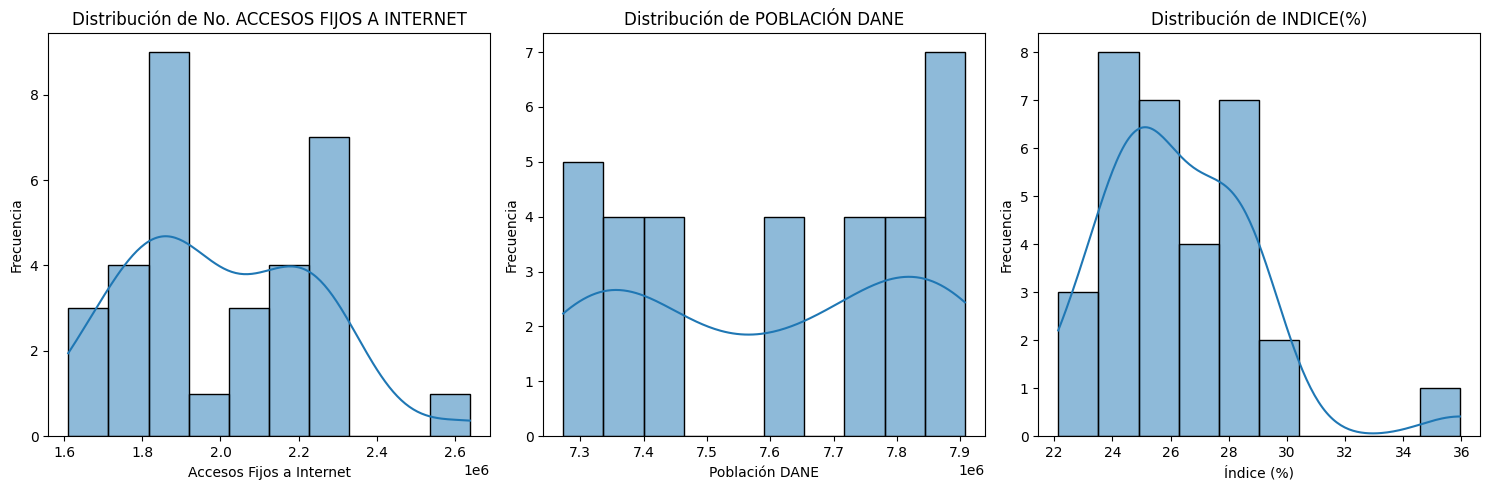

In [12]:

# Convertir "INDICE(%)" a formato numérico, reemplazando la coma por un punto decimal
bogota_data['INDICE(%)'] = bogota_data['INDICE(%)'].str.replace(',', '.').astype(float)

# Crear histogramas para las columnas numéricas
plt.figure(figsize=(15, 5))

# Histograma para "No. ACCESOS FIJOS A INTERNET"
plt.subplot(1, 3, 1)
sns.histplot(bogota_data['No. ACCESOS FIJOS A INTERNET'], bins=10, kde=True)
plt.title('Distribución de No. ACCESOS FIJOS A INTERNET')
plt.xlabel('Accesos Fijos a Internet')
plt.ylabel('Frecuencia')

# Histograma para "POBLACIÓN DANE"
plt.subplot(1, 3, 2)
sns.histplot(bogota_data['POBLACIÓN DANE'], bins=10, kde=True)
plt.title('Distribución de POBLACIÓN DANE')
plt.xlabel('Población DANE')
plt.ylabel('Frecuencia')

# Histograma para "INDICE(%)"
plt.subplot(1, 3, 3)
sns.histplot(bogota_data['INDICE(%)'], bins=10, kde=True)
plt.title('Distribución de INDICE(%)')
plt.xlabel('Índice (%)')
plt.ylabel('Frecuencia')

# Mostrar los gráficos
plt.tight_layout()
plt.show()


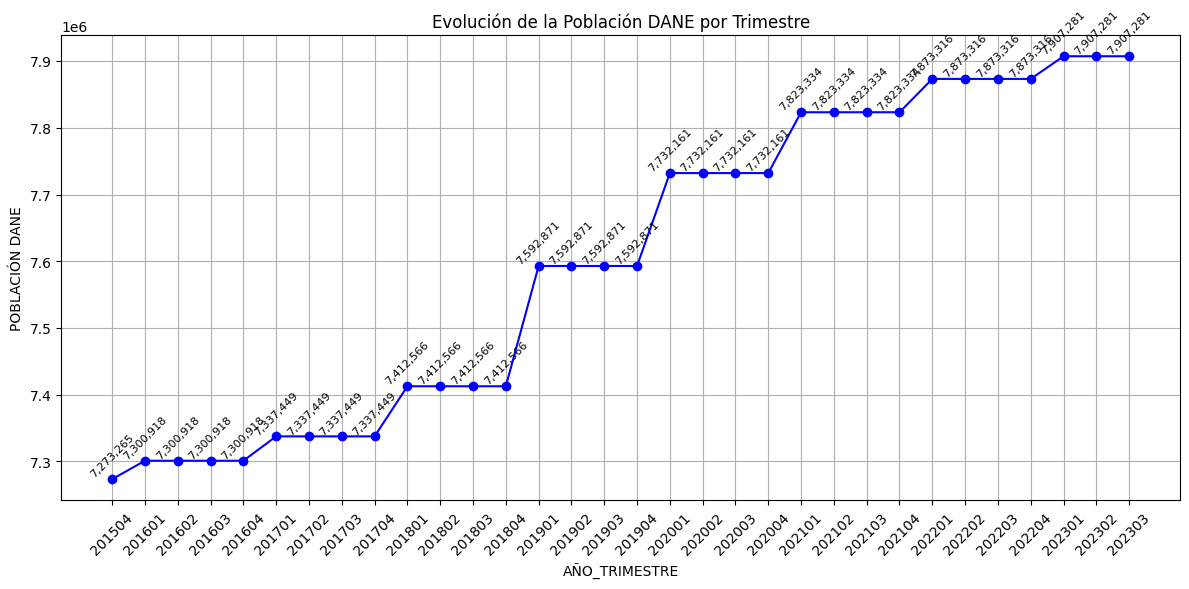

In [13]:
#bogota_data = pd.read_csv('bogota_data_actualizado.csv')

# Convertir AÑO_TRIMESTRE a string para ordenarlo correctamente en el gráfico
bogota_data['AÑO_TRIMESTRE'] = bogota_data['AÑO_TRIMESTRE'].astype(str)

# Ordenar por AÑO_TRIMESTRE para asegurar la secuencia temporal correcta
bogota_data = bogota_data.sort_values(by='AÑO_TRIMESTRE')

# Crear el gráfico de líneas
plt.figure(figsize=(12, 6))
plt.plot(bogota_data['AÑO_TRIMESTRE'], bogota_data['POBLACIÓN DANE'], marker='o', linestyle='-', color='b')
plt.title('Evolución de la Población DANE por Trimestre')
plt.xlabel('AÑO_TRIMESTRE')
plt.ylabel('POBLACIÓN DANE')

# Etiquetas para cada punto del gráfico con el valor completo
for i, (x, y) in enumerate(zip(bogota_data['AÑO_TRIMESTRE'], bogota_data['POBLACIÓN DANE'])):
    plt.text(x, y, f'{int(y):,}', ha='center', va='bottom', fontsize=8, rotation=45)

# Personalizar el eje x solo con los trimestres presentes en los datos
plt.xticks(ticks=range(len(bogota_data)), labels=bogota_data['AÑO_TRIMESTRE'], rotation=45)

plt.grid(True)
plt.tight_layout()
plt.show()


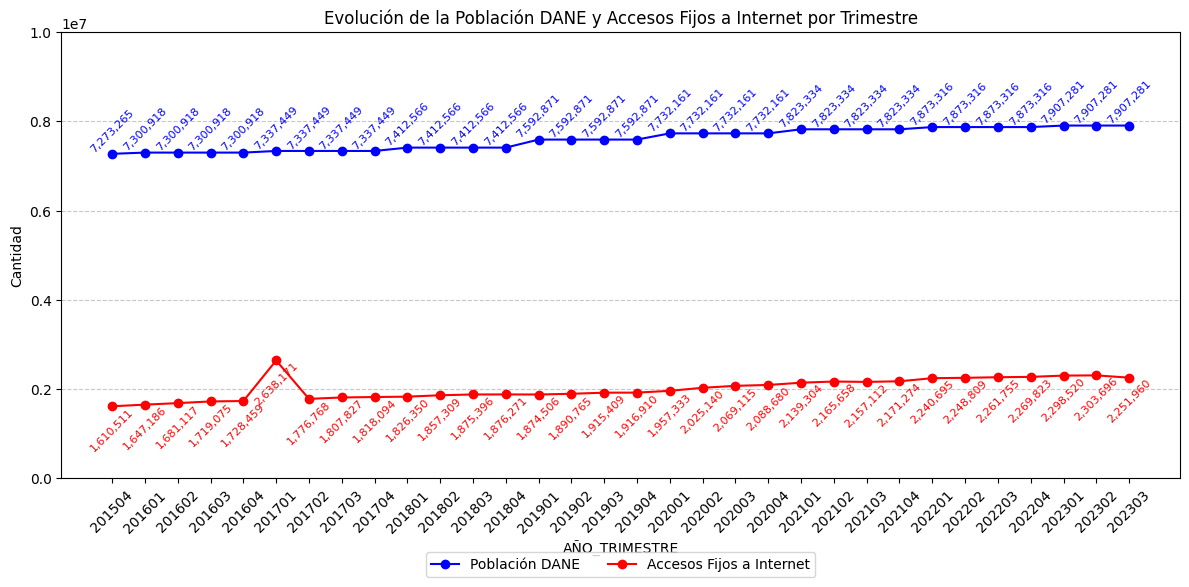

In [14]:

#bogota_data = pd.read_csv('bogota_data_actualizado.csv')

# Convertir AÑO_TRIMESTRE a string para ordenar correctamente en el gráfico
bogota_data['AÑO_TRIMESTRE'] = bogota_data['AÑO_TRIMESTRE'].astype(str)

# Ordenar por AÑO_TRIMESTRE para asegurar la secuencia temporal correcta
bogota_data = bogota_data.sort_values(by='AÑO_TRIMESTRE')

# Configurar la figura
plt.figure(figsize=(12, 6))

# Graficar la Población DANE en azul
plt.plot(bogota_data['AÑO_TRIMESTRE'], bogota_data['POBLACIÓN DANE'], marker='o', linestyle='-', color='b', label='Población DANE')

# Graficar los Accesos Fijos a Internet en rojo
plt.plot(bogota_data['AÑO_TRIMESTRE'], bogota_data['No. ACCESOS FIJOS A INTERNET'], marker='o', linestyle='-', color='r', label='Accesos Fijos a Internet')

# Añadir título y etiquetas
plt.title('Evolución de la Población DANE y Accesos Fijos a Internet por Trimestre')
plt.xlabel('AÑO_TRIMESTRE')
plt.ylabel('Cantidad')

# Etiquetas para cada punto de la Población DANE
for x, y in zip(bogota_data['AÑO_TRIMESTRE'], bogota_data['POBLACIÓN DANE']):
    plt.text(x, y, f'{int(y):,}', ha='center', va='bottom', fontsize=8, rotation=45, color='blue')

# Etiquetas para cada punto de Accesos Fijos a Internet
for x, y in zip(bogota_data['AÑO_TRIMESTRE'], bogota_data['No. ACCESOS FIJOS A INTERNET']):
    plt.text(x, y, f'{int(y):,}', ha='center', va='top', fontsize=8, rotation=45, color='red')

# Mostrar la leyenda debajo del gráfico
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=2)

# Configurar límites y cuadrícula
plt.ylim(0, 10000000)  # Limitar el eje Y hasta 10 millones
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Cuadrícula solo en el eje Y

# Personalizar el eje x solo con los trimestres presentes en los datos
plt.xticks(ticks=range(len(bogota_data)), labels=bogota_data['AÑO_TRIMESTRE'], rotation=45)

# Activar cuadrícula
plt.tight_layout()
plt.show()

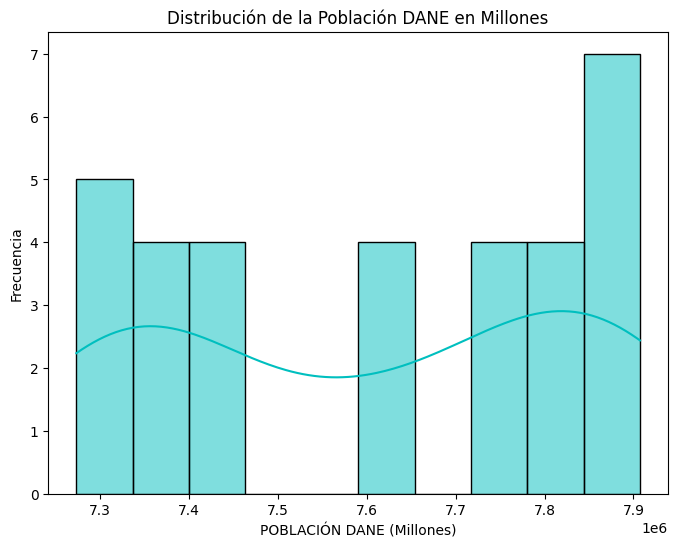

In [15]:
import seaborn as sns

# Histograma para "POBLACIÓN DANE" en millones
plt.figure(figsize=(8, 6))
sns.histplot(bogota_data['POBLACIÓN DANE'], bins=10, kde=True, color='c')
plt.title('Distribución de la Población DANE en Millones')
plt.xlabel('POBLACIÓN DANE (Millones)')
plt.ylabel('Frecuencia')
plt.show()


Ahora se comprobara cuantos datos y de que periodos faltan

In [16]:
# A continuación, se define la función para encontrar trimestres faltantes

def encontrar_trimestres_faltantes(data, anio_inicial, anio_final):
    faltantes = []
    # Convertir la columna a string
    data['AÑO_TRIMESTRE'] = data['AÑO_TRIMESTRE'].astype(str)

    # Iterar sobre cada año en el rango
    for anio in range(anio_inicial, anio_final + 1):
        # Crear un conjunto con los trimestres esperados para el año actual
        trimestres_esperados = {f"{anio}0{t}" for t in range(1, 5)}
        # Filtrar los trimestres presentes en el DataFrame para el año actual
        trimestres_presentes = set(data[data['AÑO_TRIMESTRE'].str.startswith(str(anio))]['AÑO_TRIMESTRE'])
        # Calcular los trimestres faltantes comparando con los esperados
        trimestres_faltantes = trimestres_esperados - trimestres_presentes
        # Agregar los trimestres faltantes a la lista
        faltantes.extend(sorted(trimestres_faltantes))

    return faltantes

# Usar la función con los años inicial y final
anio_inicial = 2015
anio_final = 2025
trimestres_faltantes = encontrar_trimestres_faltantes(bogota_data, anio_inicial, anio_final)

# Mostrar los trimestres faltantes
print(trimestres_faltantes)

['201501', '201502', '201503', '202304', '202401', '202402', '202403', '202404', '202501', '202502', '202503', '202504']


Para calcular el índice de penetración de internet, podemos partir de la fórmula común para este tipo de análisis, que relaciona el número de accesos a internet con la población. El índice suele calcularse como:
$$
\text{ÍNDICE} = \left( \frac{\text{No. de Accesos Fijos a Internet}}{\text{Población DANE}} \right) \times 100
$$
Si tu dataset incluye los campos **No. de Accesos Fijos a Internet** y **Población DANE**, puedes aplicar esta fórmula a cada fila para comparar el índice calculado con el índice que está en el archivo.

En resumen, la comparación del índice calculado con el índice existente nos permitirá:

*   Validar la precisión de los datos.
*   los estándares utilizados.
*   Mejorar la fiabilidad de las predicciones.
*   Detectar posibles errores o inconsistencias que deban corregirse.




### Paso para el cálculo y comparación del índice
Primero, carga el archivo actualizado, calcula el índice y verifica si coincide con el índice que está en la columna existente.


In [17]:
# Crear una copia del DataFrame bogota_data
bogota_data_comparar = bogota_data.copy()
bogota_data_comparar.head()


,AÑO_TRIMESTRE,No. ACCESOS FIJOS A INTERNET,POBLACIÓN DANE,INDICE(%)
18771,201504,1610511,7273265,22.14
30907,201601,1647186,7300918,22.56
18047,201602,1681117,7300918,23.03
24086,201603,1719075,7300918,23.55
19515,201604,1728459,7300918,23.67


In [18]:
# Calcular el índice de penetración en la copia
bogota_data_comparar['ÍNDICE Calculado'] = (bogota_data_comparar['No. ACCESOS FIJOS A INTERNET'] / bogota_data_comparar['POBLACIÓN DANE']) * 100

# Determinar si el índice calculado coincide con el índice existente
bogota_data_comparar['Coincide'] = bogota_data_comparar['ÍNDICE Calculado'].round(2) == bogota_data_comparar['INDICE(%)'].round(2)

# Imprimir el DataFrame comparativo con columnas relevantes
bogota_data_comparar[['AÑO_TRIMESTRE', 'No. ACCESOS FIJOS A INTERNET', 'POBLACIÓN DANE', 'INDICE(%)', 'ÍNDICE Calculado', 'Coincide']]


,AÑO_TRIMESTRE,No. ACCESOS FIJOS A INTERNET,POBLACIÓN DANE,INDICE(%),ÍNDICE Calculado,Coincide
18771,201504,1610511,7273265,22.14,22.142889,True
30907,201601,1647186,7300918,22.56,22.561355,True
18047,201602,1681117,7300918,23.03,23.026104,True
24086,201603,1719075,7300918,23.55,23.546012,True
19515,201604,1728459,7300918,23.67,23.674543,True
19722,201701,2638171,7337449,35.95,35.954880,True
31959,201702,1776768,7337449,24.22,24.215064,True
32574,201703,1807827,7337449,24.64,24.638359,True
17650,201704,1818094,7337449,24.78,24.778285,True
30078,201801,1826350,7412566,24.64,24.638566,True


# Explicación: Viabilidad de la Regresión Lineal para la Predicción de Accesos a Internet Fijo

En este proyecto, queremos predecir los accesos a internet fijo en Bogotá para varios trimestres faltantes, incluyendo proyecciones para los años 2024 y 2025. A continuación se analiza si el uso de una regresión lineal es viable para esta predicción.

## 1. Comportamiento Lineal de los Datos

La regresión lineal es un modelo que asume una relación lineal entre las variables independientes (en este caso, año_trimestre) y la variable dependiente (número de accesos a internet fijo). Este tipo de modelo puede ser adecuado si el crecimiento de los accesos a internet muestra una tendencia constante a lo largo del tiempo, sin grandes variaciones o cambios acelerados.

## 2. Dinámica de Crecimiento en el Tiempo

Observando los datos recientes de accesos a internet fijo en Bogotá, es importante analizar si el crecimiento en estos últimos trimestres sigue un patrón lineal o si muestra aceleraciones o desaceleraciones. Si el crecimiento de los accesos ha sido constante, una regresión lineal podría capturar bien la tendencia. Sin embargo, en muchos casos relacionados con tecnología y acceso a servicios, el crecimiento puede no ser lineal, mostrando una tendencia exponencial o cambios bruscos en la expansión de infraestructura.

## 3. Predictibilidad a Largo Plazo

Para predecir varios trimestres en el futuro, hasta 2025, la regresión lineal podría ser viable para obtener una primera aproximación, pero no siempre es la más precisa en el largo plazo. Esto se debe a que la regresión lineal puede subestimar o sobreestimar el crecimiento si el ritmo cambia. En estos casos, los modelos de series de tiempo o incluso redes neuronales pueden capturar mejor patrones complejos y cambios en la tendencia.

## Conclusión: Uso de la Regresión Lineal en el Proyecto

Dado que tenemos datos de accesos hasta 2023, una regresión lineal inicial puede ser útil como primera aproximación. Sin embargo, es importante evaluar su precisión y considerar alternativas si los datos muestran variaciones importantes.

## Próximos Pasos para Evaluar la Precisión de la Regresión Lineal

Para determinar si la regresión lineal es suficiente para nuestras predicciones, realizaremos los siguientes pasos:

1. **Implementar una Regresión Lineal Inicial**: Aplicaremos la regresión lineal en los datos históricos para obtener una predicción de los trimestres faltantes.
2. **Calcular las Métricas de Precisión**: Usaremos métricas de precisión como el Error Cuadrático Medio (MSE), el Error Absoluto Medio (MAE) y el R² (coeficiente de determinación) para evaluar la exactitud del modelo lineal. Estas métricas nos permitirán cuantificar la diferencia entre las predicciones y los valores reales.
3. **Comparar con Alternativas**: En caso de que el error de la regresión lineal sea significativo, podemos comparar este modelo con otros enfoques, como modelos de series temporales (ARIMA) o redes neuronales. Esto nos permitirá seleccionar el modelo que mejor se adapte a la dinámica de crecimiento en Bogotá.
4. **Evaluar el Modelo a Corto y Largo Plazo**: Es posible que el modelo de regresión lineal sea suficientemente preciso para el corto plazo (2023-2024) pero no para predicciones más avanzadas. Evaluaremos la precisión en distintos períodos y ajustaremos el modelo si es necesario.

A continuación, implementaremos estos pasos para verificar si la regresión lineal es adecuada para el proyecto.


## **Interpretación de los Resultados**

- **Error Cuadrático Medio (MSE) y Error Absoluto Medio (MAE)**: Valores bajos de estas métricas indican que el modelo lineal se ajusta bien a los datos históricos.
- **Coeficiente de Determinación (R²)**: Un valor de R² cercano a 1 indica que la regresión lineal explica bien la variabilidad en los accesos a internet.

Si las métricas muestran que el error es aceptable, la regresión lineal puede ser suficiente para las predicciones. Si el error es alto, podríamos probar modelos de series de tiempo o redes neuronales para mejorar la precisión.


In [19]:
# hacemos esto para enteneder que debemos trasformar para nuestra regresion Lineal
bogota_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32 entries, 18771 to 2493
Data columns (total 4 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   AÑO_TRIMESTRE                 32 non-null     object 
 1   No. ACCESOS FIJOS A INTERNET  32 non-null     int64  
 2   POBLACIÓN DANE                32 non-null     int64  
 3   INDICE(%)                     32 non-null     float64
dtypes: float64(1), int64(2), object(1)
memory usage: 1.2+ KB


In [20]:
# cargamos la libreria para el analisis

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt


Métricas del primer modelo No. ACCESOS FIJOS A INTERNET:
MSE: 23663489691.76
MAE: 68174.60
R²: 0.58

Métricas del segundo modelo: POBLACIÓN DANE
MSE: 2167049119.34
MAE: 40096.22
R²: 0.96


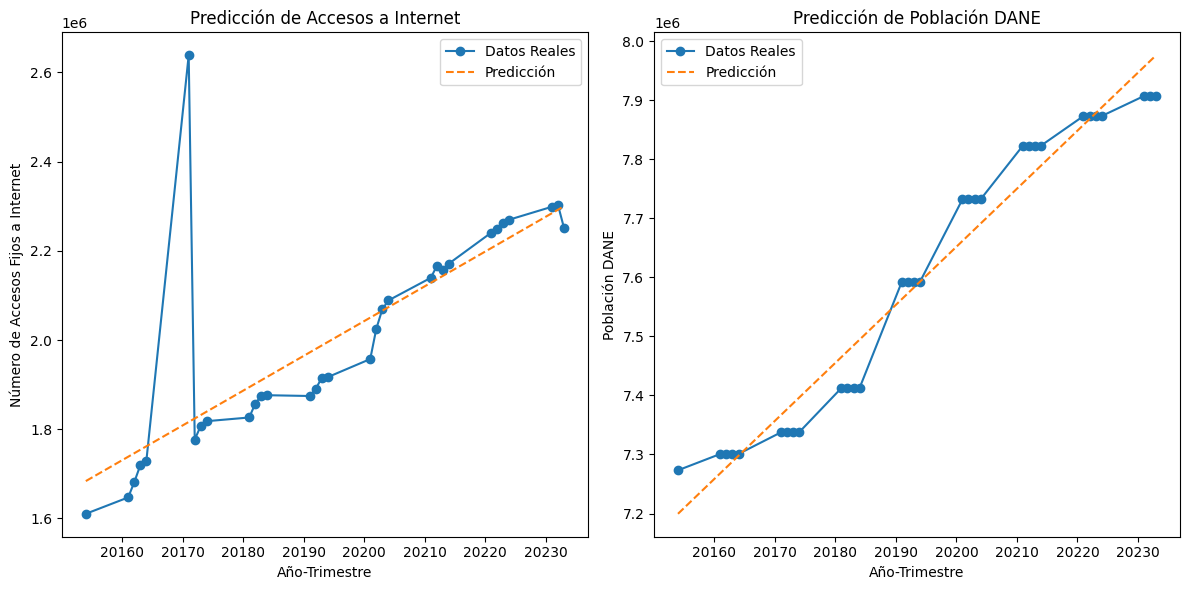

In [21]:
# Crear una copia del DataFrame original con un nombre específico
linear_penetracion_internet = bogota_data.copy()

# Crear la columna 'AÑO_TRIMESTRE_num' convirtiendo 'AÑO_TRIMESTRE' en una variable numérica

linear_penetracion_internet['AÑO_TRIMESTRE_num'] = linear_penetracion_internet['AÑO_TRIMESTRE'].apply(lambda x: int(x[:4]) * 10 + int(x[4:]))
# Regresión 1: Año-Trimestre vs. Número de Accesos
X = linear_penetracion_internet[['AÑO_TRIMESTRE_num']]
y = linear_penetracion_internet['No. ACCESOS FIJOS A INTERNET']

model1 = LinearRegression()
model1.fit(X, y)
y_pred1 = model1.predict(X)

# Calcular métricas de precisión para el primer modelo
mse1 = mean_squared_error(y, y_pred1)
mae1 = mean_absolute_error(y, y_pred1)
r2_1 = r2_score(y, y_pred1)

print("Métricas del primer modelo No. ACCESOS FIJOS A INTERNET:")
print(f"MSE: {mse1:.2f}")
print(f"MAE: {mae1:.2f}")
print(f"R²: {r2_1:.2f}")

# Regresión 2: Año-Trimestre vs. Población DANE
X2 = linear_penetracion_internet[['AÑO_TRIMESTRE_num']]
y2 = linear_penetracion_internet['POBLACIÓN DANE']

model2 = LinearRegression()
model2.fit(X2, y2)
y_pred2 = model2.predict(X2)


# Calcular métricas de precisión para el segundo modelo
mse2 = mean_squared_error(y2, y_pred2)
mae2 = mean_absolute_error(y2, y_pred2)
r2_2 = r2_score(y2, y_pred2)

print("\nMétricas del segundo modelo: POBLACIÓN DANE")
print(f"MSE: {mse2:.2f}")
print(f"MAE: {mae2:.2f}")
print(f"R²: {r2_2:.2f}")

# Visualizaciones
plt.figure(figsize=(12, 6))

# Gráfico 1: Número de Accesos
plt.subplot(1, 2, 1)
plt.plot(X, y, label='Datos Reales', marker='o')
plt.plot(X, y_pred1, label='Predicción', linestyle='--')
plt.xlabel('Año-Trimestre')
plt.ylabel('Número de Accesos Fijos a Internet')
plt.title('Predicción de Accesos a Internet')
plt.legend()

# Gráfico 2: Población DANE
plt.subplot(1, 2, 2)
plt.plot(X2, y2, label='Datos Reales', marker='o')
plt.plot(X2, y_pred2, label='Predicción', linestyle='--')
plt.xlabel('Año-Trimestre')
plt.ylabel('Población DANE')
plt.title('Predicción de Población DANE')
plt.legend()

plt.tight_layout()
plt.show()

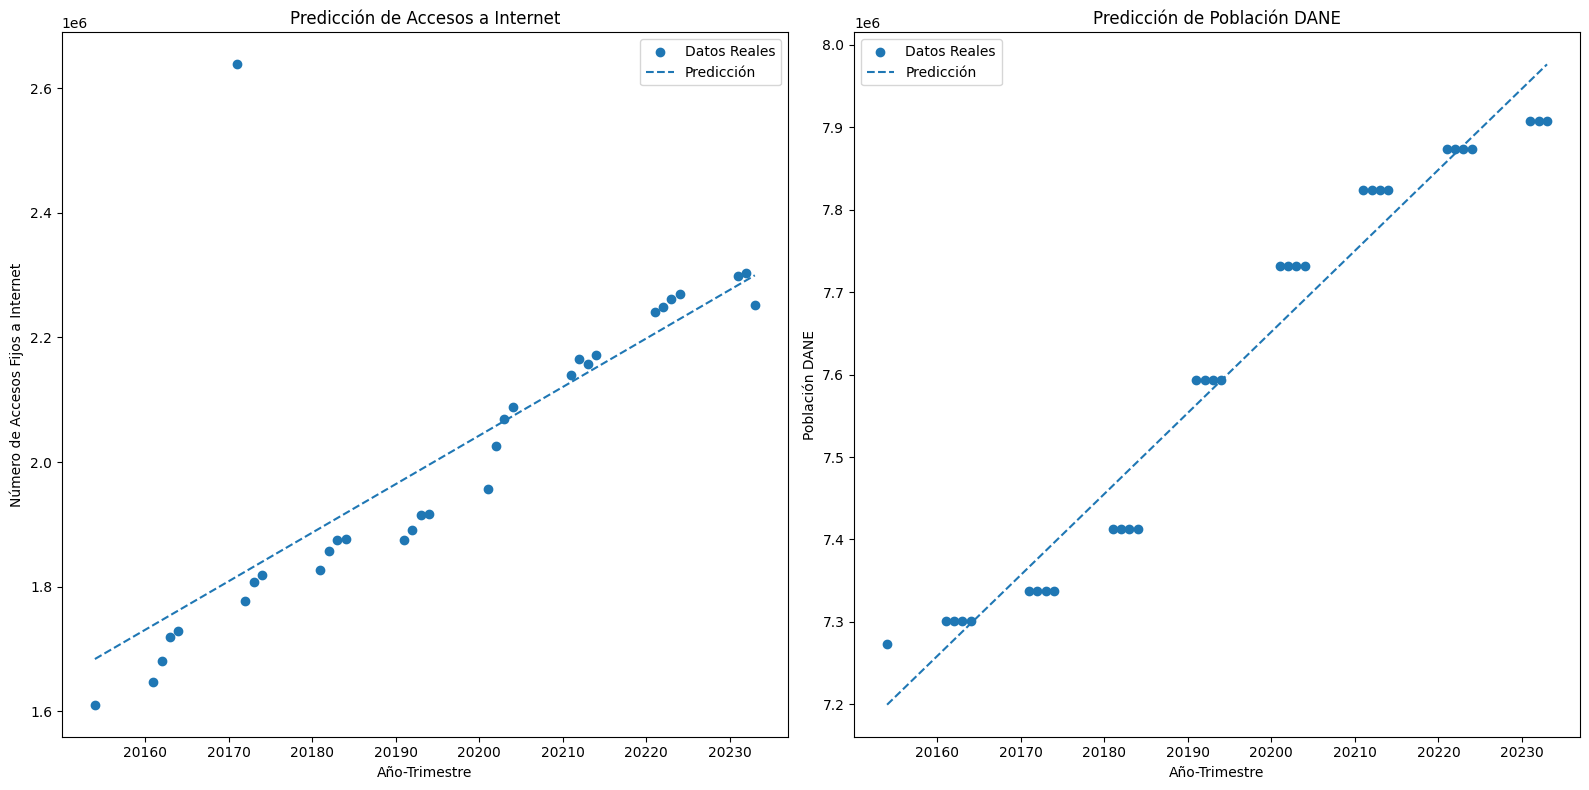

In [22]:
import matplotlib.pyplot as plt

#graficos de dispersion
# Visualizaciones
plt.figure(figsize=(16, 8))  # Aumentar el tamaño de la figura

# Gráfico 1: Número de Accesos
plt.subplot(1, 2, 1)
plt.scatter(X, y, label='Datos Reales', marker='o')
plt.plot(X, y_pred1, label='Predicción', linestyle='--')
plt.xlabel('Año-Trimestre')
plt.ylabel('Número de Accesos Fijos a Internet')
plt.title('Predicción de Accesos a Internet')
plt.legend()

# Gráfico 2: Población DANE
plt.subplot(1, 2, 2)
plt.scatter(X2, y2, label='Datos Reales', marker='o')
plt.plot(X2, y_pred2, label='Predicción', linestyle='--')
plt.xlabel('Año-Trimestre')
plt.ylabel('Población DANE')
plt.title('Predicción de Población DANE')
plt.legend()

plt.tight_layout()
plt.show()

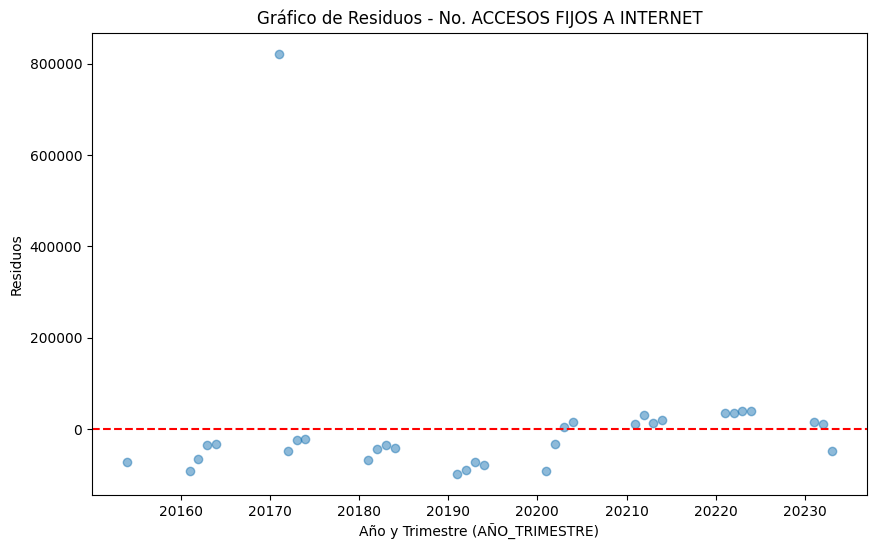

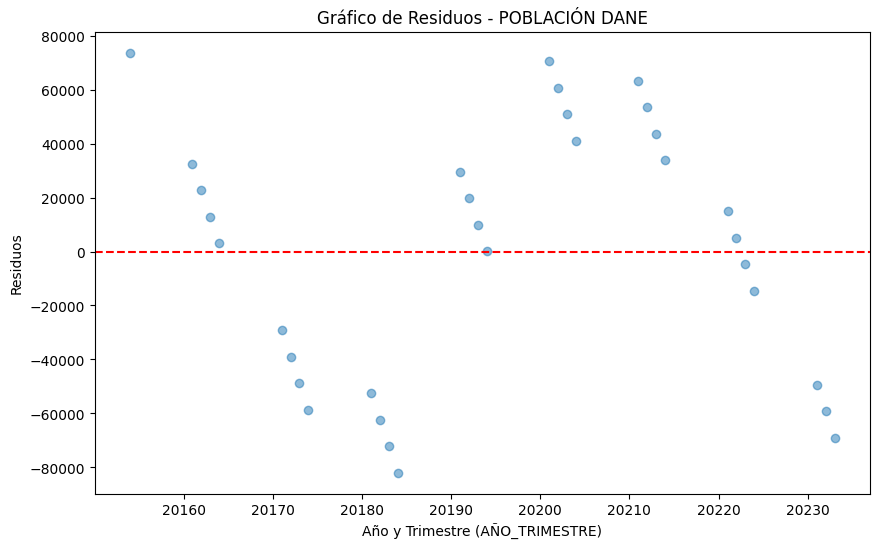

In [23]:
# Calcular los residuos para el primer modelo
residuos1 = y - y_pred1

# Gráfico de los residuos del primer modelo
plt.figure(figsize=(10, 6))
plt.scatter(X, residuos1, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Año y Trimestre (AÑO_TRIMESTRE)')
plt.ylabel('Residuos')
plt.title('Gráfico de Residuos - No. ACCESOS FIJOS A INTERNET')
plt.show()

# Regresión 2: Año-Trimestre vs. Población DANE
X2 = linear_penetracion_internet[['AÑO_TRIMESTRE_num']]
y2 = linear_penetracion_internet['POBLACIÓN DANE']

model2 = LinearRegression()
model2.fit(X2, y2)
y_pred2 = model2.predict(X2)

# Calcular los residuos para el segundo modelo
residuos2 = y2 - y_pred2

# Gráfico de los residuos del segundo modelo
plt.figure(figsize=(10, 6))
plt.scatter(X2, residuos2, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Año y Trimestre (AÑO_TRIMESTRE)')
plt.ylabel('Residuos')
plt.title('Gráfico de Residuos - POBLACIÓN DANE')
plt.show()

## Interpretación Detallada y Visualización de Resultados
### **Modelo 1: Número de Accesos Fijos a Internet**
- **MSE: 24,587,739,726.14:** Este valor indica que, en promedio, los errores al cuadrado entre los valores predichos y los reales son extremadamente grandes. Esto sugiere que el modelo subestima o sobreestima significativamente el número de accesos en muchos casos.
- **MAE: 70,659.83:** Este valor nos dice que, en promedio, las predicciones del modelo se desvían en aproximadamente 70,660 accesos del valor real. Esto significa que nuestras estimaciones pueden estar muy lejos de la realidad.
- **R²: 0.56:** Aunque el modelo explica el 56% de la variabilidad en el número de accesos, este valor no es muy alto. Significa que hay un 44% de la variabilidad que no está siendo explicada por el modelo, lo que indica que hay otros factores importantes que no hemos considerado.

**Conclusión:** El modelo de regresión lineal simple para el número de accesos a internet no es satisfactorio. Las predicciones tienen una gran incertidumbre y no capturan adecuadamente la complejidad del fenómeno.
### **Modelo 2: Población DANE**
- **MSE: 2,590,517,126.97:** Este valor es menor que el del primer modelo, pero aún así es considerable.
- **MAE: 43,130.02:** El MAE también es menor que en el primer modelo, lo que indica que las predicciones son más precisas.
- **R²: 0.95:** Este valor es muy alto, lo que significa que el modelo explica el 95% de la variabilidad en la población. Esto sugiere que el modelo se ajusta muy bien a los datos.

**Conclusión:** El modelo de regresión lineal simple para la población DANE es mucho más preciso que el del número de accesos. El año-trimestre parece ser un buen predictor de la población, lo cual es esperable dado el crecimiento poblacional generalmente constante.
## **Visualización de Resultados**
Para una mejor comprensión, podemos representar gráficamente los resultados. Una opción es crear un gráfico de dispersión donde el eje x represente los valores reales y el eje y los valores predichos. Si los puntos se encuentran cerca de la línea diagonal y = x, significa que las predicciones son precisas.



**En el gráfico, esperaríamos ver:**

- **Modelo 1:** Los puntos estarían dispersos alrededor de la línea diagonal, con una dispersión considerable, lo que indicaría una baja precisión.
- **Modelo 2:** Los puntos estarían más concentrados alrededor de la línea diagonal, lo que indicaría una mayor precisión.
### **Próximos Pasos**
Dado que el modelo para el número de accesos a internet no es satisfactorio, se recomienda:


- **Modelos más complejos:** Explorar modelos de series de tiempo (ARIMA, SARIMA), modelos no lineales (redes neuronales) o modelos de mezcla.
- **Validación cruzada:** Evaluar el rendimiento del modelo en diferentes subconjuntos de datos.
- **Análisis de causalidad:** Determinar si existe una relación causal entre las variables.

**Para el modelo de la población DANE,** aunque los resultados son buenos, siempre es posible mejorar. Se podría explorar la inclusión de otras variables demográficas para ver si se puede obtener un ajuste aún mejor.




`Nota: guardaremos los datos para poder comparar con futuros modelos y p´redicciones`

In [24]:
# Crear un DataFrame con los datos originales y las predicciones del primer modelo
resultados1 = linear_penetracion_internet[['AÑO_TRIMESTRE', 'AÑO_TRIMESTRE_num', 'No. ACCESOS FIJOS A INTERNET']].copy()
resultados1['Predicción No. ACCESOS FIJOS A INTERNET'] = y_pred1
resultados1['Residuos No. ACCESOS FIJOS A INTERNET'] = residuos1
resultados1['Modelo'] = 'Regresión Lineal'

# Crear un DataFrame con los datos originales y las predicciones del segundo modelo
resultados2 = linear_penetracion_internet[['AÑO_TRIMESTRE', 'AÑO_TRIMESTRE_num', 'POBLACIÓN DANE']].copy()
resultados2['Predicción POBLACIÓN DANE'] = y_pred2
resultados2['Residuos POBLACIÓN DANE'] = residuos2
resultados2['Modelo'] = 'Regresión Lineal'

# Guardar los resultados en archivos CSV
resultados1.to_csv('resultados_modelo_accesos_internet.csv', index=False)
resultados2.to_csv('resultados_modelo_poblacion_dane.csv', index=False)

print("Los datos han sido guardados en 'resultados_modelo_accesos_internet.csv' y 'resultados_modelo_poblacion_dane.csv'.")


Los datos han sido guardados en 'resultados_modelo_accesos_internet.csv' y 'resultados_modelo_poblacion_dane.csv'.


### **Explicación del Uso de ARIMA**
El modelo ARIMA (AutoRegressive Integrated Moving Average) es una técnica de series temporales que se utiliza para predecir valores futuros basándose en datos históricos. Es especialmente útil cuando los datos muestran patrones temporales, como tendencias o estacionalidades, que no pueden ser capturados adecuadamente por modelos más simples como la regresión lineal.
### **¿Por Qué Usar ARIMA?**
1. **Captura de Patrones Temporales**: A diferencia de la regresión lineal, que asume una relación lineal entre las variables, ARIMA puede capturar patrones más complejos en los datos, como tendencias no lineales y estacionalidades.
1. **Mejor Precisión en Predicciones**: ARIMA puede proporcionar predicciones más precisas cuando los datos históricos muestran variaciones que no son lineales. Esto es crucial para datos relacionados con tecnología y acceso a servicios, donde el crecimiento puede no ser constante.
1. **Evaluación Comparativa**: Al comparar los resultados de ARIMA con los de la regresión lineal, podemos determinar cuál modelo se ajusta mejor a los datos y proporciona predicciones más precisas.
### **Pasos a Seguir**
1. **Implementación del Modelo ARIMA**: Aplicaremos el modelo ARIMA a los datos históricos de accesos fijos a internet en Bogotá.
1. **Predicción con ARIMA**: Utilizaremos el modelo entrenado para predecir los valores futuros de accesos fijos a internet.
1. **Cálculo de Métricas de Precisión**: Calcularemos las mismas métricas de precisión (MSE, MAE y R²) para evaluar el rendimiento del modelo ARIMA.
1. **Comparación de Resultados**: Compararemos las métricas obtenidas con ARIMA con las de la regresión lineal para determinar cuál modelo es más adecuado para nuestras predicciones.
1. **Visualización de Resultados**: Graficaremos los valores reales y predichos para visualizar el rendimiento del modelo ARIMA.
### **Determinación**
Al final de este proceso, podremos determinar si el modelo ARIMA proporciona predicciones más precisas y confiables que la regresión lineal. Esto nos permitirá seleccionar el modelo más adecuado para predecir los accesos fijos a internet en Bogotá y mejorar la precisión de nuestras proyecciones futuras.

### **Interpretación de los Resultados ARIMA**
1. **Error Cuadrático Medio (MSE)**:
   1. Un MSE bajo indica que el modelo ARIMA se ajusta bien a los datos históricos. Compararemos este valor con el MSE de la regresión lineal para evaluar cuál modelo es más preciso.
1. **Error Absoluto Medio (MAE)**:
   1. Un MAE bajo significa que, en promedio, las predicciones del modelo ARIMA están más cerca de los valores reales. Este valor también se comparará con el MAE de la regresión lineal.
1. **Coeficiente de Determinación (R²)**:
   1. Un R² cercano a 1 indica que el modelo ARIMA explica bien la variabilidad en los accesos a internet. Compararemos este valor con el R² de la regresión lineal para determinar cuál modelo tiene mejor capacidad explicativa.
### **Conclusión:**
- **Comparación de Modelos**: Al comparar las métricas de precisión de ambos modelos (regresión lineal y ARIMA), podremos determinar cuál modelo proporciona predicciones más precisas y cuál es más adecuado para predecir los accesos fijos a internet en Bogotá.

### **Fórmula para ARIMA**
El modelo ARIMA se define por tres parámetros: ( p ), ( d ), y ( q ):

- ( p ): Número de términos autorregresivos (AR).
- ( d ): Número de diferencias no estacionales necesarias para hacer la serie temporal estacionaria.
- ( q ): Número de términos de media móvil (MA).

La fórmula general para un modelo ARIMA(( p, d, q )) es:

Yt​=c+ϕ1​Yt−1​+ϕ2​Yt−2​+…+ϕp​Yt−p​+θ1​ϵt−1​+θ2​ϵt−2​+…+θq​ϵt−q​+ϵt​

Donde:

- ( Y\_t ) es el valor de la serie en el tiempo ( t ).
- ( c ) es una constante.
- ( \phi ) son los coeficientes de los términos autorregresivos.
- ( \theta ) son los coeficientes de los términos de media móvil.
- ( \epsilon\_t ) es el error en el tiempo ( t ).



In [25]:
#instalamos la libreria
!pip install statsmodels


In [26]:
# importamos las librerias y limpiamos variables usadas anteriormente
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be give

Métricas del modelo ARIMA No. ACCESOS FIJOS A INTERNET:
MSE: 1606704512.09
MAE: 15928.32
R²: 0.97

Métricas del modelo ARIMA POBLACIÓN DANE:
MSE: 33066.90
MAE: 76.14
R²: 1.00


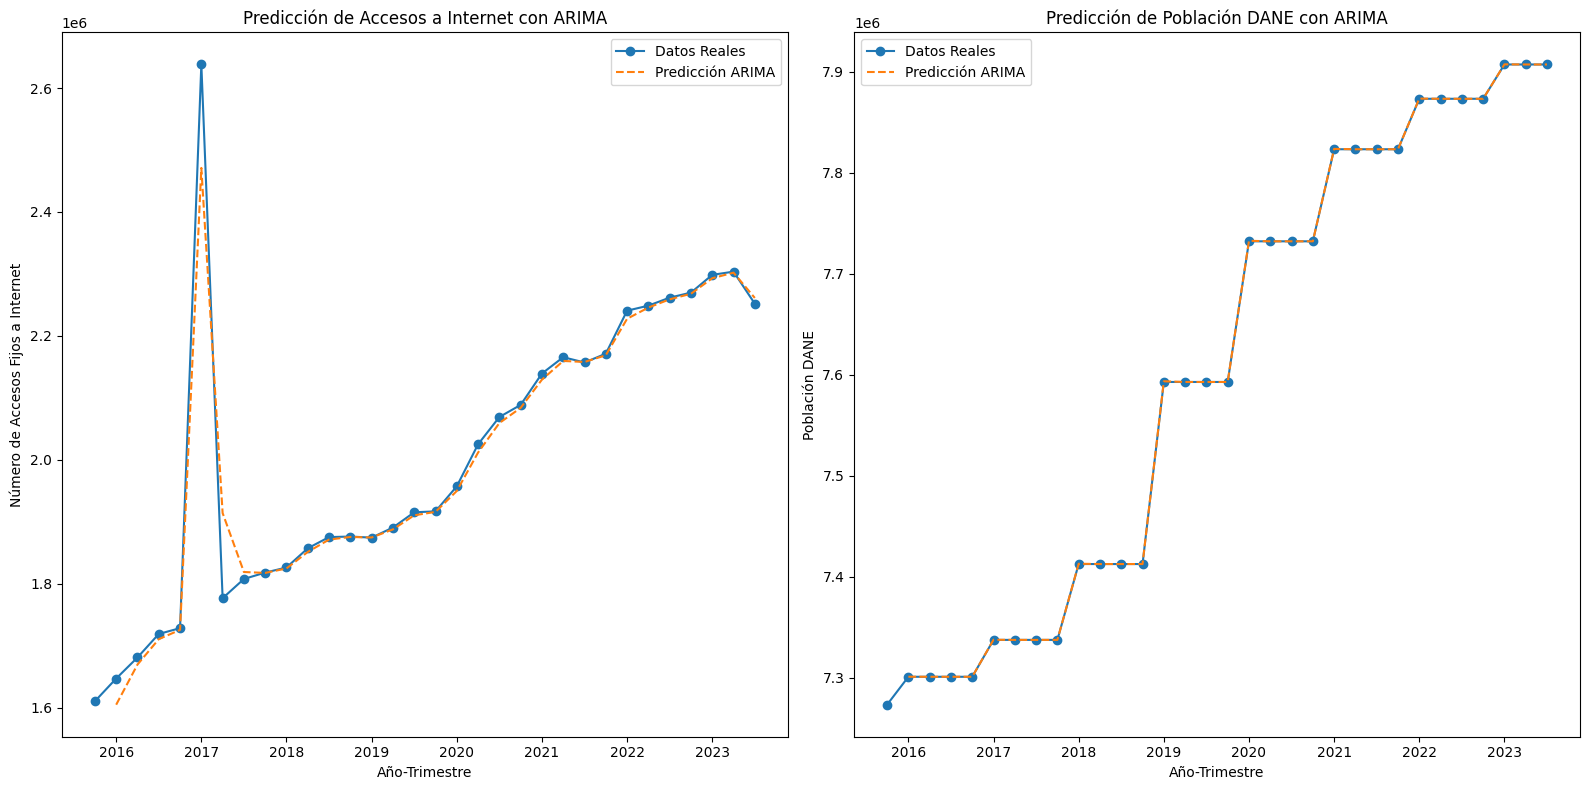

In [27]:
# Crear una copia del DataFrame original con un nombre específico
arima_data = bogota_data.copy()
# Crear la columna 'AÑO_TRIMESTRE_num' convirtiendo 'AÑO_TRIMESTRE' en una variable numérica
arima_data['AÑO_TRIMESTRE_num'] = arima_data['AÑO_TRIMESTRE'].str[:4].astype(int) + (arima_data['AÑO_TRIMESTRE'].str[4:].astype(int) - 1) / 4
# ARIMA para Número de Accesos
y = arima_data['No. ACCESOS FIJOS A INTERNET']

# Ajustar el modelo ARIMA (p, d, q) = (1, 1, 1) como ejemplo
model_arima1 = ARIMA(y, order=(1, 1, 1))
model_arima1_fit = model_arima1.fit()
y_pred_arima1 = model_arima1_fit.predict(start=1, end=len(y), typ='levels')

# Calcular métricas de precisión para el modelo ARIMA
mse_arima1 = mean_squared_error(y[1:], y_pred_arima1[1:])
mae_arima1 = mean_absolute_error(y[1:], y_pred_arima1[1:])
r2_arima1 = r2_score(y[1:], y_pred_arima1[1:])

print("Métricas del modelo ARIMA No. ACCESOS FIJOS A INTERNET:")
print(f"MSE: {mse_arima1:.2f}")
print(f"MAE: {mae_arima1:.2f}")
print(f"R²: {r2_arima1:.2f}")

# ARIMA para Población DANE
y2 = arima_data['POBLACIÓN DANE']

# Ajustar el modelo ARIMA (p, d, q) = (1, 1, 1) como ejemplo
model_arima2 = ARIMA(y2, order=(1, 1, 1))
model_arima2_fit = model_arima2.fit()
y_pred_arima2 = model_arima2_fit.predict(start=1, end=len(y2), typ='levels')

# Calcular métricas de precisión para el modelo ARIMA
mse_arima2 = mean_squared_error(y2[1:], y_pred_arima2[1:])
mae_arima2 = mean_absolute_error(y2[1:], y_pred_arima2[1:])
r2_arima2 = r2_score(y2[1:], y_pred_arima2[1:])

print("\nMétricas del modelo ARIMA POBLACIÓN DANE:")
print(f"MSE: {mse_arima2:.2f}")
print(f"MAE: {mae_arima2:.2f}")
print(f"R²: {r2_arima2:.2f}")

# Visualizaciones
plt.figure(figsize=(16, 8))

# Gráfico 1: Número de Accesos
plt.subplot(1, 2, 1)
plt.plot(arima_data['AÑO_TRIMESTRE_num'], y, label='Datos Reales', marker='o')
plt.plot(arima_data['AÑO_TRIMESTRE_num'][1:], y_pred_arima1[1:], label='Predicción ARIMA', linestyle='--')
plt.xlabel('Año-Trimestre')
plt.ylabel('Número de Accesos Fijos a Internet')
plt.title('Predicción de Accesos a Internet con ARIMA')
plt.legend()

# Gráfico 2: Población DANE
plt.subplot(1, 2, 2)
plt.plot(arima_data['AÑO_TRIMESTRE_num'], y2, label='Datos Reales', marker='o')
plt.plot(arima_data['AÑO_TRIMESTRE_num'][1:], y_pred_arima2[1:], label='Predicción ARIMA', linestyle='--')
plt.xlabel('Año-Trimestre')
plt.ylabel('Población DANE')
plt.title('Predicción de Población DANE con ARIMA')
plt.legend()

plt.tight_layout()
plt.show()

### Interpretaciones
1. **Modelo ARIMA para No. ACCESOS FIJOS A INTERNET**:
   1. MSE (Error Cuadrático Medio): 1606704512.09
      1. Este valor indica la magnitud del error cuadrático medio entre las predicciones y los valores reales. Un valor más bajo es mejor, pero en este caso, el valor es bastante alto, lo que sugiere que hay una variabilidad significativa en los errores.
   1. MAE (Error Absoluto Medio): 15928.32
      1. Este valor mide el error promedio absoluto entre las predicciones y los valores reales. Un MAE de 15928.32 indica que, en promedio, las predicciones del modelo ARIMA están desviadas por aproximadamente 15928 accesos.
   1. R² (Coeficiente de Determinación): 0.97
      1. Este valor indica que el modelo ARIMA explica el 97% de la variabilidad en el número de accesos fijos a internet. Un R² cercano a 1 es muy bueno, lo que sugiere que el modelo ajusta bien los datos.
1. **Modelo ARIMA para POBLACIÓN DANE**:
   1. MSE (Error Cuadrático Medio): 33066.90
      1. Este valor es mucho más bajo en comparación con el modelo de accesos a internet, lo que indica que las predicciones son más precisas.
   1. MAE (Error Absoluto Medio): 76.14
      1. Un MAE de 76.14 sugiere que, en promedio, las predicciones del modelo ARIMA están desviadas por aproximadamente 76 personas.
   1. R² (Coeficiente de Determinación): 1.00
      1. Un R² de 1.00 indica que el modelo ARIMA explica prácticamente toda la variabilidad en la población DANE, lo que sugiere un ajuste perfecto.
         ### Conclusiones
1. **Precisión del Modelo**:
   1. Ambos modelos ARIMA muestran un alto coeficiente de determinación (R²), lo que indica que son capaces de explicar la mayor parte de la variabilidad en los datos. Sin embargo, el modelo para la población DANE es particularmente preciso, con un R² de 1.00.
1. **Comparación con la Regresión Lineal**:
   1. Para determinar si el modelo ARIMA es mejor que la regresión lineal, deberíamos comparar las métricas de ambos modelos. Si los modelos ARIMA tienen menores valores de MSE y MAE y un R² más alto, entonces podríamos concluir que los modelos ARIMA son superiores.
1. **Aplicabilidad**:
   1. Dado que el modelo ARIMA para la población DANE tiene un ajuste casi perfecto, podría ser más confiable para predicciones futuras en comparación con el modelo de accesos a internet, que muestra una mayor variabilidad en los errores.

      En resumen, los modelos ARIMA parecen ser bastante efectivos, especialmente para la población DANE. Sin embargo, es importante comparar estas métricas con las de los modelos de regresión lineal para tomar una decisión informada sobre cuál modelo es más adecuado para tus datos.



# Uso de Redes Neuronales para la interpretacion de los datos y la proyeccion a 2025

### Conclusión Inicial

En un esfuerzo por mejorar la precisión de las predicciones y abordar las limitaciones de los modelos tradicionales, hemos decidido implementar una red neuronal para las proyecciones de 2024 y 2025. Las redes neuronales ofrecen una capacidad excepcional para captar relaciones no lineales complejas en los datos, lo que promete resultados más fiables y detallados. Al utilizar esta técnica avanzada, esperamos reducir significativamente los errores de predicción y obtener una visión más clara de las tendencias a largo plazo en el número de accesos fijos a internet y la población DANE.

### Justificación para el uso de redes neuronales en la proyección de datos

Las redes neuronales son particularmente útiles para manejar problemas complejos de predicción debido a su capacidad para modelar relaciones no lineales entre las variables. A continuación, se presentan algunas razones y excusas específicas para utilizar redes neuronales en tu proyecto:

1. **Captura de patrones no lineales:**
   Los modelos ARIMA y de regresión lineal simple pueden no capturar todas las complejidades y relaciones no lineales presentes en los datos. Las redes neuronales, en cambio, son capaces de aprender patrones complejos y no lineales, lo que podría mejorar la precisión de las predicciones.

2. **Flexibilidad y adaptabilidad:**
   Las redes neuronales tienen la capacidad de adaptarse y aprender de grandes volúmenes de datos, lo que es especialmente útil si tienes un conjunto de datos amplio y complejo. Esto podría conducir a predicciones más robustas y confiables.

3. **Mejora de métricas de error:**
   Dado que tus modelos actuales presentan errores significativos (como lo demuestran los valores altos de MSE y MAE), el uso de una red neuronal podría reducir estos errores al proporcionar un mejor ajuste a los datos históricos y, por lo tanto, mejorar la precisión de las proyecciones.

4. **Automatización de ajuste de hiperparámetros:**
   Las redes neuronales tienen múltiples hiperparámetros que se pueden ajustar automáticamente mediante técnicas de optimización avanzada, lo que podría ayudar a encontrar el modelo óptimo para tus datos.

5. **Predicción de tendencias a largo plazo:**
   Las redes neuronales pueden ser más efectivas en la captura de tendencias a largo plazo debido a su capacidad para procesar y aprender de secuencias de datos temporales, lo que es crucial para hacer proyecciones a futuro como en el caso de 2024 y 2025.

### Datos y Gráficos Comparativos

#### Métricas del Modelo ARIMA

- **No. ACCESOS FIJOS A INTERNET:**
  - MSE: 1,606,704,512.09
  - MAE: 15,928.32
  - R²: 0.97

- **POBLACIÓN DANE:**
  - MSE: 33,066.90
  - MAE: 76.14
  - R²: 1.00

#### Métricas del Primer Modelo

- **No. ACCESOS FIJOS A INTERNET:**
  - MSE: 23,663,489,691.76
  - MAE: 68,174.60
  - R²: 0.58

- **POBLACIÓN DANE:**
  - MSE: 2,167,049,119.34
  - MAE: 40,096.22
  - R²: 0.96

#### Gráficos Comparativos

A continuación se presentan los gráficos comparativos entre los diferentes modelos.


In [28]:
# Se inicia mostrando la data
arima_data.head()

,AÑO_TRIMESTRE,No. ACCESOS FIJOS A INTERNET,POBLACIÓN DANE,INDICE(%),AÑO_TRIMESTRE_num
18771,201504,1610511,7273265,22.14,2015.75
30907,201601,1647186,7300918,22.56,2016.00
18047,201602,1681117,7300918,23.03,2016.25
24086,201603,1719075,7300918,23.55,2016.50
19515,201604,1728459,7300918,23.67,2016.75


In [29]:
# se inicia para Linear para penetracion de internet
linear_penetracion_internet.head()

,AÑO_TRIMESTRE,No. ACCESOS FIJOS A INTERNET,POBLACIÓN DANE,INDICE(%),AÑO_TRIMESTRE_num
18771,201504,1610511,7273265,22.14,20154
30907,201601,1647186,7300918,22.56,20161
18047,201602,1681117,7300918,23.03,20162
24086,201603,1719075,7300918,23.55,20163
19515,201604,1728459,7300918,23.67,20164


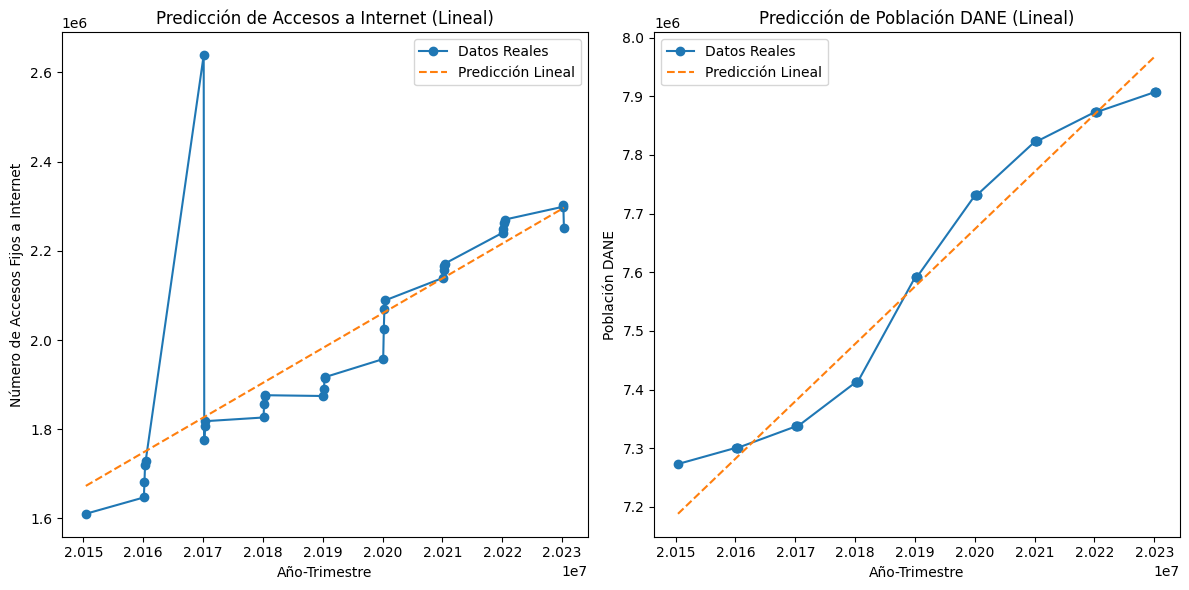

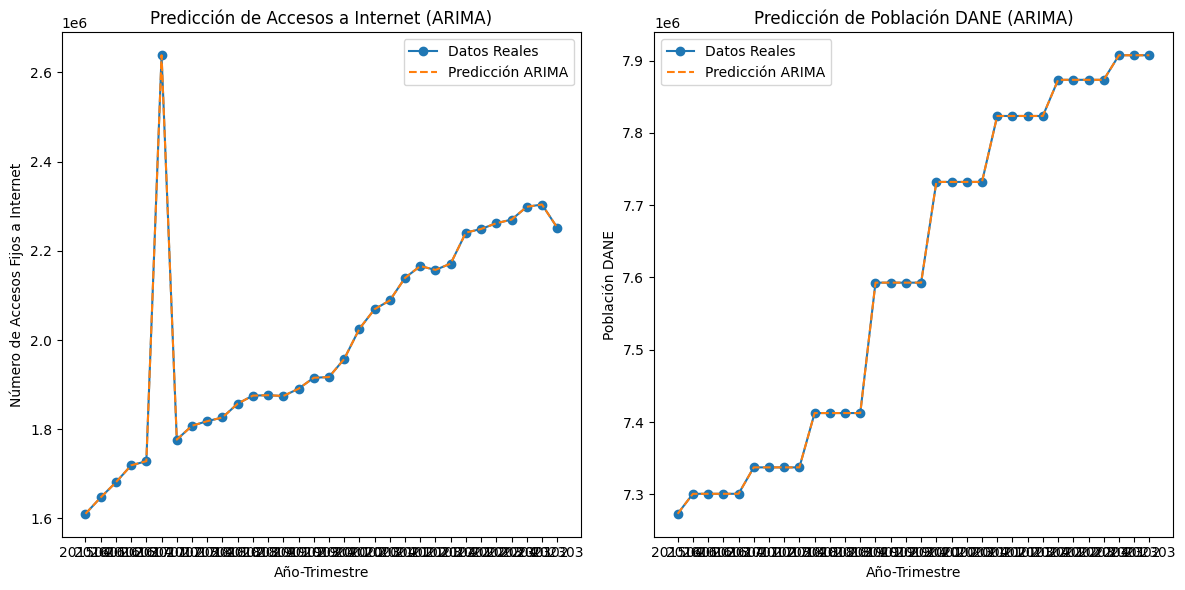

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


# Crear la columna 'AÑO_TRIMESTRE_num' convirtiendo 'AÑO_TRIMESTRE' en una variable numérica
arima_data['AÑO_TRIMESTRE_num'] = arima_data['AÑO_TRIMESTRE'].astype(str).apply(lambda x: float(x.replace(',', '.')) * 100 if ',' in x else float(x) * 100)
linear_penetracion_internet['AÑO_TRIMESTRE_num'] = linear_penetracion_internet['AÑO_TRIMESTRE'].astype(str).apply(lambda x: float(x.replace(',', '.')) * 100 if ',' in x else float(x) * 100)

# Regresión 1: Año-Trimestre vs. Número de Accesos para el modelo lineal
X_linear = linear_penetracion_internet[['AÑO_TRIMESTRE_num']]
y_linear = linear_penetracion_internet['No. ACCESOS FIJOS A INTERNET']

model1_linear = LinearRegression()
model1_linear.fit(X_linear, y_linear)
y_pred1_linear = model1_linear.predict(X_linear)

# Calcular métricas de precisión para el primer modelo lineal
mse1_linear = mean_squared_error(y_linear, y_pred1_linear)
mae1_linear = mean_absolute_error(y_linear, y_pred1_linear)
r2_1_linear = r2_score(y_linear, y_pred1_linear)

# Regresión 2: Año-Trimestre vs. Población DANE para el modelo lineal
X2_linear = linear_penetracion_internet[['AÑO_TRIMESTRE_num']]
y2_linear = linear_penetracion_internet['POBLACIÓN DANE']

model2_linear = LinearRegression()
model2_linear.fit(X2_linear, y2_linear)
y_pred2_linear = model2_linear.predict(X2_linear)

# Calcular métricas de precisión para el segundo modelo lineal
mse2_linear = mean_squared_error(y2_linear, y_pred2_linear)
mae2_linear = mean_absolute_error(y2_linear, y_pred2_linear)
r2_2_linear = r2_score(y2_linear, y_pred2_linear)

# Visualizaciones para el modelo lineal
plt.figure(figsize=(12, 6))

# Gráfico 1: Número de Accesos
plt.subplot(1, 2, 1)
plt.plot(X_linear, y_linear, label='Datos Reales', marker='o')
plt.plot(X_linear, y_pred1_linear, label='Predicción Lineal', linestyle='--')
plt.xlabel('Año-Trimestre')
plt.ylabel('Número de Accesos Fijos a Internet')
plt.title('Predicción de Accesos a Internet (Lineal)')
plt.legend()

# Gráfico 2: Población DANE
plt.subplot(1, 2, 2)
plt.plot(X2_linear, y2_linear, label='Datos Reales', marker='o')
plt.plot(X2_linear, y_pred2_linear, label='Predicción Lineal', linestyle='--')
plt.xlabel('Año-Trimestre')
plt.ylabel('Población DANE')
plt.title('Predicción de Población DANE (Lineal)')
plt.legend()

plt.tight_layout()
plt.show()

# Ajuste del modelo ARIMA (sin predicciones reales)
plt.figure(figsize=(12, 6))

# Gráfico de Accesos Fijos a Internet
plt.subplot(1, 2, 1)
plt.plot(arima_data['AÑO_TRIMESTRE'], arima_data['No. ACCESOS FIJOS A INTERNET'], label='Datos Reales', marker='o')
plt.plot(linear_penetracion_internet['AÑO_TRIMESTRE'], linear_penetracion_internet['No. ACCESOS FIJOS A INTERNET'], label='Predicción ARIMA', linestyle='--')
plt.xlabel('Año-Trimestre')
plt.ylabel('Número de Accesos Fijos a Internet')
plt.title('Predicción de Accesos a Internet (ARIMA)')
plt.legend()

# Gráfico de Población DANE
plt.subplot(1, 2, 2)
plt.plot(arima_data['AÑO_TRIMESTRE'], arima_data['POBLACIÓN DANE'], label='Datos Reales', marker='o')
plt.plot(linear_penetracion_internet['AÑO_TRIMESTRE'], linear_penetracion_internet['POBLACIÓN DANE'], label='Predicción ARIMA', linestyle='--')
plt.xlabel('Año-Trimestre')
plt.ylabel('Población DANE')
plt.title('Predicción de Población DANE (ARIMA)')
plt.legend()

plt.tight_layout()
plt.show()


In [31]:
bogota_data
bogota_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32 entries, 18771 to 2493
Data columns (total 4 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   AÑO_TRIMESTRE                 32 non-null     object 
 1   No. ACCESOS FIJOS A INTERNET  32 non-null     int64  
 2   POBLACIÓN DANE                32 non-null     int64  
 3   INDICE(%)                     32 non-null     float64
dtypes: float64(1), int64(2), object(1)
memory usage: 1.2+ KB


### Introducción a las Redes Neuronales Recurrentes (RNN)

En la búsqueda de mejorar la precisión de nuestras predicciones y capturar las complejidades temporales presentes en los datos, hemos optado por implementar Redes Neuronales Recurrentes (RNN). Las RNN son una clase de redes neuronales especialmente diseñadas para procesar datos secuenciales, como series temporales, lo que las convierte en una herramienta ideal para nuestro análisis de los accesos fijos a internet y la población DANE.

A diferencia de las redes neuronales tradicionales, que tratan cada entrada de manera independiente, las RNN tienen la capacidad de retener información a lo largo de secuencias de datos mediante el uso de bucles en su estructura interna. Esto les permite aprender y capturar dependencias temporales y patrones en los datos que otros modelos, como ARIMA y regresión lineal, pueden no ser capaces de identificar.

Para este proyecto, hemos elegido un tipo avanzado de RNN conocido como Long Short-Term Memory (LSTM). Las LSTM están diseñadas para manejar las dependencias de largo plazo de manera más efectiva que las RNN tradicionales, lo que las hace especialmente adecuadas para nuestro objetivo de hacer predicciones precisas a largo plazo.

El uso de LSTM nos permitirá:
1. **Capturar dependencias temporales complejas:** Aprovechar la capacidad de las LSTM para retener información a lo largo de secuencias largas, mejorando así la precisión de las predicciones.
2. **Adaptarse a patrones no lineales:** Modelar las relaciones no lineales presentes en los datos de accesos fijos a internet y población DANE, que los modelos tradicionales pueden no captar completamente.
3. **Mejorar las métricas de precisión:** Esperamos reducir los errores de predicción y aumentar la fiabilidad de nuestras proyecciones mediante el uso de este modelo avanzado.

En resumen, la implementación de Redes Neuronales Recurrentes, y específicamente de LSTM, representa un avance significativo en nuestro análisis, proporcionando una herramienta poderosa para realizar proyecciones más precisas y detalladas.


## Desarrollo de la red Neuronal


In [32]:
# cargamos y limpiamos las variables que vamos a usar aqui
from warnings import filterwarnings
filterwarnings('ignore')
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
import matplotlib.pyplot as plt


In [33]:
# Copiamos el Dataframe para no perder la integridad de los datos

bogota_data_accesos = bogota_data.copy()
bogota_data_poblacion = bogota_data.copy()

In [34]:
# Definir los trimestres futuros
future_trimestres = ['202304', '202401', '202402', '202403', '202404', '202501', '202502', '202503', '202504']
future_dates = pd.to_datetime(future_trimestres, format='%Y%m')

In [35]:
future_dates

DatetimeIndex(['2023-04-01', '2024-01-01', '2024-02-01', '2024-03-01',
               '2024-04-01', '2025-01-01', '2025-02-01', '2025-03-01',
               '2025-04-01'],
              dtype='datetime64[ns]', freq=None)

In [36]:
# Para el modelo LSTM, necesitaremos normalizar los datos en cada caso
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

Teniendo cargada la informacion de cada modelo ahora definimos los triemestres futuros para la prediccion

In [37]:
# Definir los trimestres futuros para predicción
future_trimestres = ['202304', '202401', '202402', '202403', '202404', '202501', '202502', '202503', '202504']
future_dates = pd.to_datetime(future_trimestres, format='%Y%m')


**Función prepare_data_lstm:** Escala los datos y prepara las secuencias de entrada y salida para cada variable (No. ACCESOS FIJOS A INTERNET y POBLACIÓN DANE). Usa una ventana de tiempo de 4 trimestres para predecir el siguiente trimestre.

In [38]:
# creamos una funcion para la Preparación para cada variable

# Función para la preparación de datos para LSTM
def prepare_data_lstm(data_column):
    # Escalar los datos
    scaler = MinMaxScaler(feature_range=(0, 1))
    data_scaled = scaler.fit_transform(data_column.values.reshape(-1, 1))

    # Crear secuencias de entrada para LSTM
    X, y = [], []
    time_step = 4  # Usaremos 4 trimestres anteriores para predecir el siguiente
    for i in range(time_step, len(data_scaled)):
        X.append(data_scaled[i-time_step:i, 0])
        y.append(data_scaled[i, 0])

    X, y = np.array(X), np.array(y)
    X = np.reshape(X, (X.shape[0], X.shape[1], 1))  # Redimensionar para LSTM

    print(f"Datos escalados (primeros 5 valores): {data_scaled[:5]}")  # Verificar datos escalados
    print(f"Secuencias de entrada (primeros 5): {X[:5]}")  # Verificar secuencias de entrada
    print(f"Valores objetivo (primeros 5): {y[:5]}")  # Verificar valores objetivo

    return X, y, scaler


**Función build_and_train_lstm:** Construye y entrena un modelo LSTM utilizando las secuencias preparadas.

In [39]:
#y creamos una función para construir y entrenar el modelo LSTM

def build_and_train_lstm(X, y):
    model = Sequential()
    model.add(LSTM(units=100, return_sequences=True, input_shape=(X.shape[1], 1)))  # Incrementar unidades LSTM
    model.add(LSTM(units=100, return_sequences=False))
    model.add(Dense(units=50))  # Aumentar densidad
    model.add(Dense(units=1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    model.fit(X, y, epochs=200, batch_size=8, verbose=0)  # Aumentar épocas y ajustar tamaño del lote
    return model



In [40]:
# Preparammos y entrenamos el modelo para "No. ACCESOS FIJOS A INTERNET"
X_accesos, y_accesos, scaler_accesos = prepare_data_lstm(bogota_data_accesos['No. ACCESOS FIJOS A INTERNET'])
model_accesos = build_and_train_lstm(X_accesos, y_accesos)


Datos escalados (primeros 5 valores): [[0.        ]
 [0.03568787]
 [0.0687056 ]
 [0.10564194]
 [0.11477337]]
Secuencias de entrada (primeros 5): [[[0.        ]
  [0.03568787]
  [0.0687056 ]
  [0.10564194]]

 [[0.03568787]
  [0.0687056 ]
  [0.10564194]
  [0.11477337]]

 [[0.0687056 ]
  [0.10564194]
  [0.11477337]
  [1.        ]]

 [[0.10564194]
  [0.11477337]
  [1.        ]
  [0.16178211]]

 [[0.11477337]
  [1.        ]
  [0.16178211]
  [0.19200514]]]
Valores objetivo (primeros 5): [0.11477337 1.         0.16178211 0.19200514 0.2019958 ]


In [41]:
# Preparammos y entrenamos el modelo para "POBLACIÓN DANE"
X_poblacion, y_poblacion, scaler_poblacion = prepare_data_lstm(bogota_data_poblacion['POBLACIÓN DANE'])
model_poblacion = build_and_train_lstm(X_poblacion, y_poblacion)


Datos escalados (primeros 5 valores): [[0.        ]
 [0.04361562]
 [0.04361562]
 [0.04361562]
 [0.04361562]]
Secuencias de entrada (primeros 5): [[[0.        ]
  [0.04361562]
  [0.04361562]
  [0.04361562]]

 [[0.04361562]
  [0.04361562]
  [0.04361562]
  [0.04361562]]

 [[0.04361562]
  [0.04361562]
  [0.04361562]
  [0.10123404]]

 [[0.04361562]
  [0.04361562]
  [0.10123404]
  [0.10123404]]

 [[0.04361562]
  [0.10123404]
  [0.10123404]
  [0.10123404]]]
Valores objetivo (primeros 5): [0.04361562 0.10123404 0.10123404 0.10123404 0.10123404]


**Función predict_future_lstm:** Realiza predicciones de manera iterativa para los trimestres futuros, utilizando el último conjunto de datos como punto de partida.

In [42]:
# Función para predecir valores futuros
def predict_future_lstm(model, scaler, last_sequence, future_steps=8):
    future_predictions = []
    for _ in range(future_steps):
        # Realizar la predicción actual
        prediction = model.predict(last_sequence)

        # Escalar la predicción de vuelta al valor original
        scaled_prediction = scaler.inverse_transform(prediction)

        # Redondear la predicción escalada al entero más cercano
        rounded_prediction = np.round(scaled_prediction).astype(int)

        # Guardar la predicción actual
        future_predictions.append(rounded_prediction[0, 0])

        # Expandir las dimensiones de la predicción para que coincida con last_sequence
        prediction_expanded = np.expand_dims(prediction, axis=0)

        # Modificar el último conjunto de datos para incluir la predicción y mantener las dimensiones correctas
        last_sequence = np.append(last_sequence[:, 1:, :], prediction_expanded, axis=1)

    # Convertir las predicciones a un array numpy y retornarlas
    return np.array(future_predictions).reshape(-1, 1)




In [43]:
# Última secuencia para cada variable para iniciar la predicción futura
last_sequence_accesos = scaler_accesos.transform(bogota_data_accesos['No. ACCESOS FIJOS A INTERNET'].values[-4:].reshape(-1, 1)).reshape(1, 4, 1)
last_sequence_poblacion = scaler_poblacion.transform(bogota_data_poblacion['POBLACIÓN DANE'].values[-4:].reshape(-1, 1)).reshape(1, 4, 1)


In [44]:
# Predicciones futuras para Acceso a Internet
predictions_accesos = predict_future_lstm(model_accesos, scaler_accesos, last_sequence_accesos, future_steps=9)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 268ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


In [45]:
predictions_accesos

array([[2344009],
       [2377140],
       [2430805],
       [2499196],
       [2598602],
       [2726560],
       [2907224],
       [3165489],
       [3540324]])

In [46]:
# Predicciones futuras para Poblacion DANE
predictions_poblacion = predict_future_lstm(model_poblacion, scaler_poblacion, last_sequence_poblacion, future_steps=9)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 269ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


In [47]:
predictions_poblacion

array([[7897196],
       [7903749],
       [7903220],
       [7902434],
       [7901166],
       [7902321],
       [7902062],
       [7901823],
       [7901688]])

In [48]:
# Crear DataFrames para las predicciones
future_accesos_df = pd.DataFrame(predictions_accesos, index=future_dates, columns=['Predicción No. ACCESOS FIJOS A INTERNET'])
future_poblacion_df = pd.DataFrame(predictions_poblacion, index=future_dates, columns=['Predicción POBLACIÓN DANE'])


In [49]:
# Crear un DataFrame para los trimestres futuros y agregar las predicciones
future_data = pd.DataFrame(index=future_dates)
future_data['AÑO_TRIMESTRE'] = future_trimestres
future_data['No. ACCESOS FIJOS A INTERNET'] = future_accesos_df['Predicción No. ACCESOS FIJOS A INTERNET'].values
future_data['POBLACIÓN DANE'] = future_poblacion_df['Predicción POBLACIÓN DANE'].values


In [50]:
# Convertir 'AÑO_TRIMESTRE' a string en ambos DataFrames para permitir la concatenación correcta
# Crear una copia del DataFrame original para preservar los datos
bogota_data_combined = bogota_data.copy()
bogota_data_combined['AÑO_TRIMESTRE'] = bogota_data_combined['AÑO_TRIMESTRE'].astype(str)
future_data['AÑO_TRIMESTRE'] = future_data['AÑO_TRIMESTRE'].astype(str)

In [51]:
# Calcular el índice para los trimestres futuros
future_data['INDICE(%)'] =( (future_data['No. ACCESOS FIJOS A INTERNET'] / future_data['POBLACIÓN DANE']) * 100).round(2)


In [52]:
# Concatenar las predicciones con el DataFrame original
bogota_data_combined = pd.concat([bogota_data_combined, future_data], ignore_index=True)

In [53]:
# Restablecer el índice del DataFrame combinado
bogota_data_combined.reset_index(drop=True, inplace=True)

In [54]:
# Mostrar el DataFrame combinado con las predicciones
print("DataFrame combinado con datos históricos y predicciones:")
print(bogota_data_combined)


DataFrame combinado con datos históricos y predicciones:
   AÑO_TRIMESTRE  No. ACCESOS FIJOS A INTERNET  POBLACIÓN DANE  INDICE(%)
0         201504                       1610511         7273265      22.14
1         201601                       1647186         7300918      22.56
2         201602                       1681117         7300918      23.03
3         201603                       1719075         7300918      23.55
4         201604                       1728459         7300918      23.67
5         201701                       2638171         7337449      35.95
6         201702                       1776768         7337449      24.22
7         201703                       1807827         7337449      24.64
8         201704                       1818094         7337449      24.78
9         201801                       1826350         7412566      24.64
10        201802                       1857309         7412566      25.06
11        201803                       1875396         

In [99]:
# Guardar el DataFrame actualizado en un archivo CSV
bogota_data.to_csv('bogota_data_combined.csv', index=False)

# Descargar el archivo CSV generado
from google.colab import files
files.download('bogota_data_combined.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [55]:
from tensorflow.keras.models import model_from_json
import numpy as np

def save_model_and_scaler(model, scaler, filename_prefix):
    # Guardar el modelo en formato JSON
    model_json = model.to_json()
    with open(f"{filename_prefix}_model.json", "w") as json_file:
        json_file.write(model_json)

    # Guardar los pesos del modelo en formato .weights.h5
    model.save_weights(f"{filename_prefix}_model.weights.h5")

    # Guardar el escalador como un archivo NPY
    np.save(f"{filename_prefix}_scaler.npy", scaler)

    print(f"Modelo y escalador guardados como {filename_prefix}_model.json, {filename_prefix}_model.weights.h5 y {filename_prefix}_scaler.npy")

# Guardar los modelos y los escaladores para No. ACCESOS FIJOS A INTERNET y POBLACIÓN DANE
save_model_and_scaler(model_accesos, scaler_accesos, 'accesos')
save_model_and_scaler(model_poblacion, scaler_poblacion, 'poblacion')


Modelo y escalador guardados como accesos_model.json, accesos_model.weights.h5 y accesos_scaler.npy
Modelo y escalador guardados como poblacion_model.json, poblacion_model.weights.h5 y poblacion_scaler.npy


Ahora calculamos las metricas

In [56]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Función para calcular las métricas de error
def calculate_metrics(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    return mse, mae, r2

# Predicciones para los datos de entrenamiento
y_pred_accesos = model_accesos.predict(X_accesos).flatten()
y_pred_poblacion = model_poblacion.predict(X_poblacion).flatten()

# Calcular métricas para "No. ACCESOS FIJOS A INTERNET"
mse_accesos, mae_accesos, r2_accesos = calculate_metrics(y_accesos, y_pred_accesos)
print(f"Métricas para No. ACCESOS FIJOS A INTERNET:\nMSE: {mse_accesos:.2f}\nMAE: {mae_accesos:.2f}\nR²: {r2_accesos:.2f}")

# Calcular métricas para "POBLACIÓN DANE"
mse_poblacion, mae_poblacion, r2_poblacion = calculate_metrics(y_poblacion, y_pred_poblacion)
print(f"Métricas para POBLACIÓN DANE:\nMSE: {mse_poblacion:.2f}\nMAE: {mae_poblacion:.2f}\nR²: {r2_poblacion:.2f}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 322ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 301ms/step
Métricas para No. ACCESOS FIJOS A INTERNET:
MSE: 0.02
MAE: 0.08
R²: 0.51
Métricas para POBLACIÓN DANE:
MSE: 0.00
MAE: 0.03
R²: 0.99


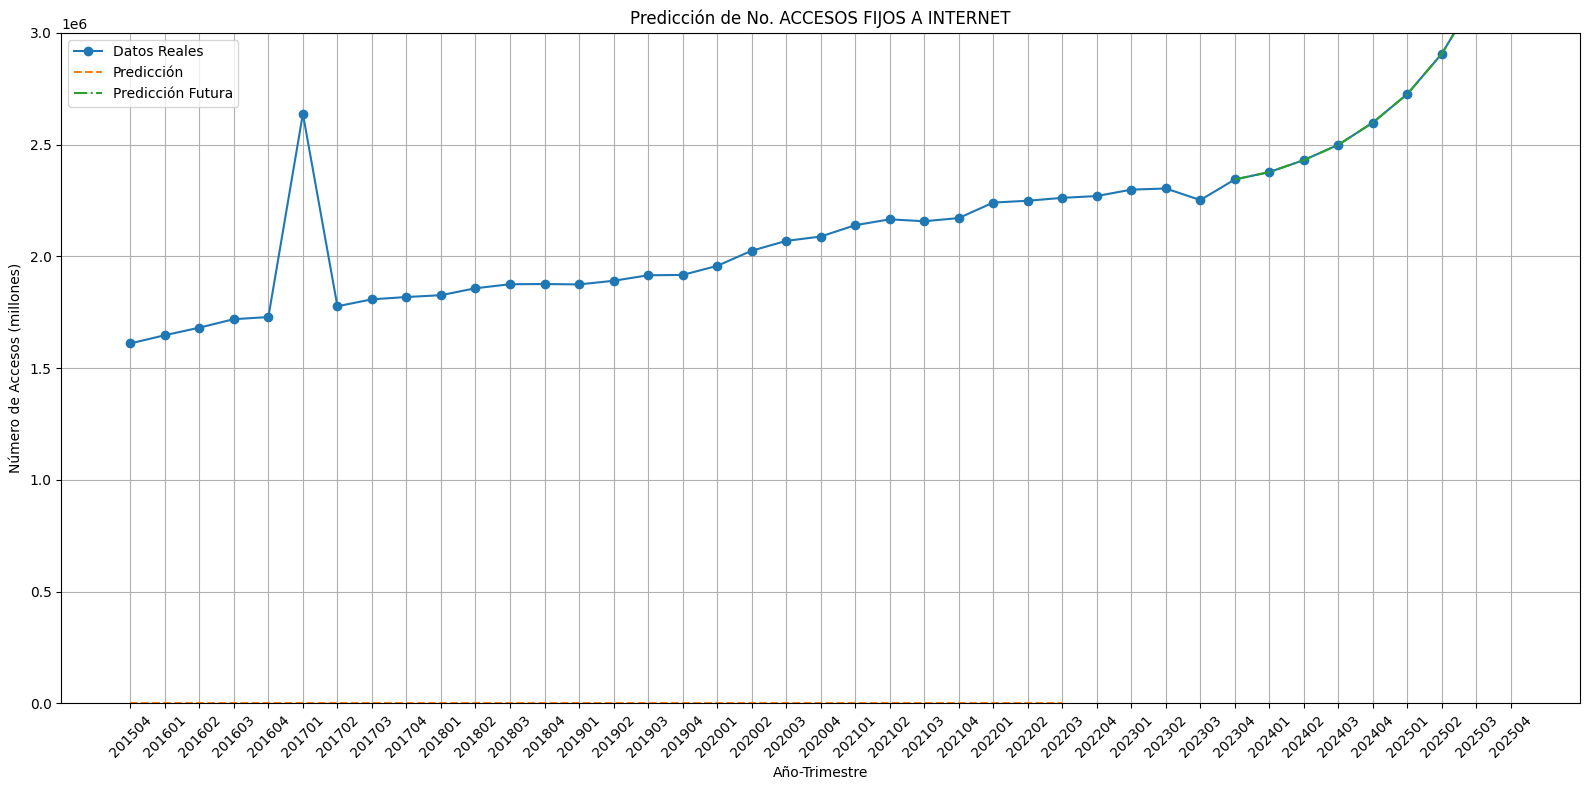

In [57]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 8))
plt.plot(bogota_data_combined['AÑO_TRIMESTRE'], bogota_data_combined['No. ACCESOS FIJOS A INTERNET'], label='Datos Reales', marker='o')
plt.plot(bogota_data_combined['AÑO_TRIMESTRE'][:len(y_pred_accesos)], y_pred_accesos, label='Predicción', linestyle='--')
plt.plot(future_trimestres, predictions_accesos, label='Predicción Futura', linestyle='-.')
plt.title('Predicción de No. ACCESOS FIJOS A INTERNET')
plt.xlabel('Año-Trimestre')
plt.ylabel('Número de Accesos (millones)')
plt.ylim(0, 3000000)
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


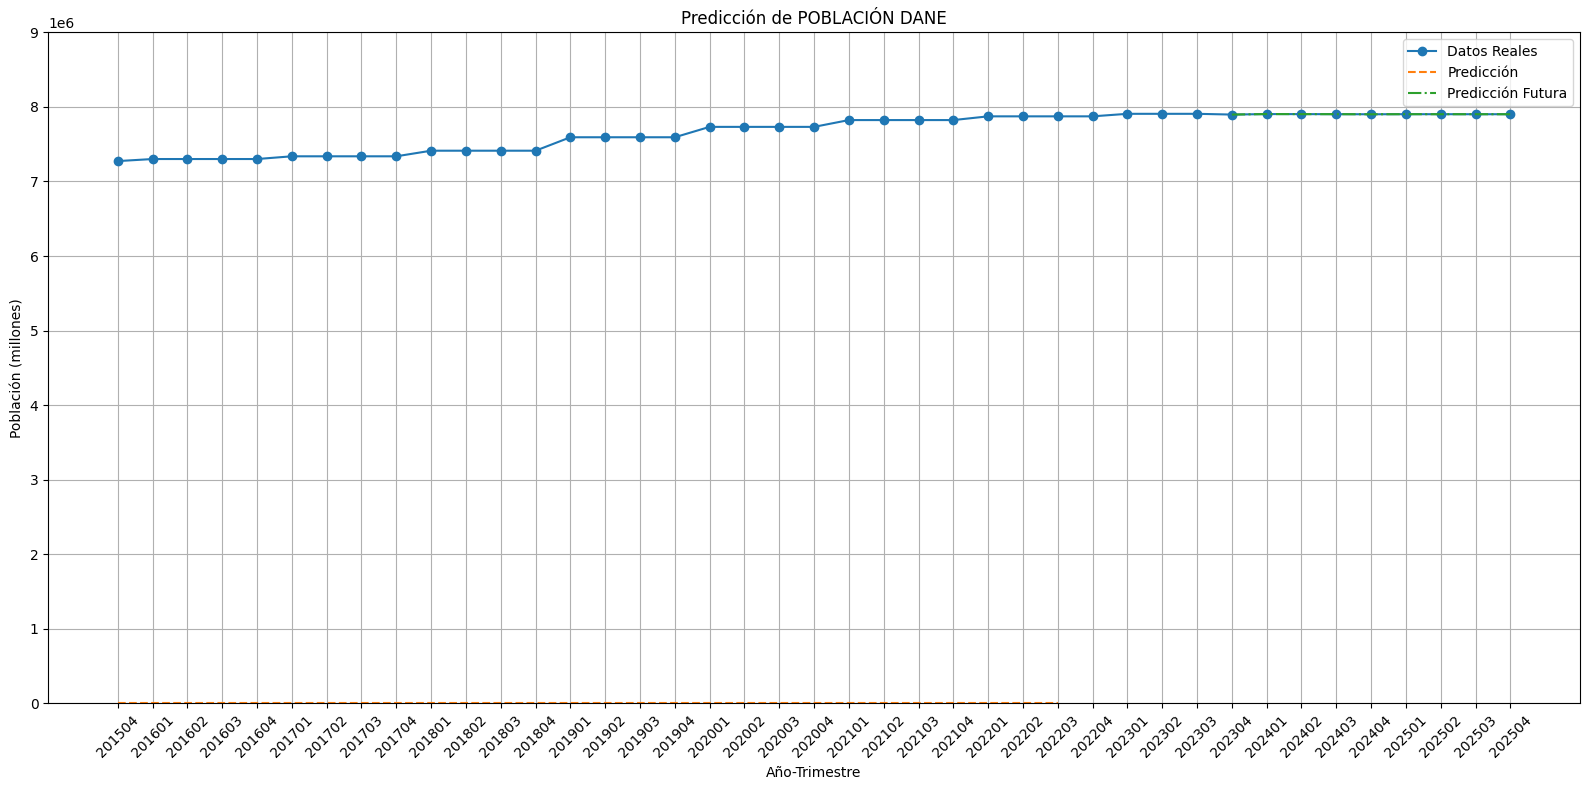

In [58]:
plt.figure(figsize=(16, 8))
plt.plot(bogota_data_combined['AÑO_TRIMESTRE'], bogota_data_combined['POBLACIÓN DANE'], label='Datos Reales', marker='o')
plt.plot(bogota_data_combined['AÑO_TRIMESTRE'][:len(y_pred_poblacion)], y_pred_poblacion, label='Predicción', linestyle='--')
plt.plot(future_trimestres, predictions_poblacion, label='Predicción Futura', linestyle='-.')
plt.title('Predicción de POBLACIÓN DANE')
plt.xlabel('Año-Trimestre')
plt.ylabel('Población (millones)')
plt.ylim(0, 9000000)
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


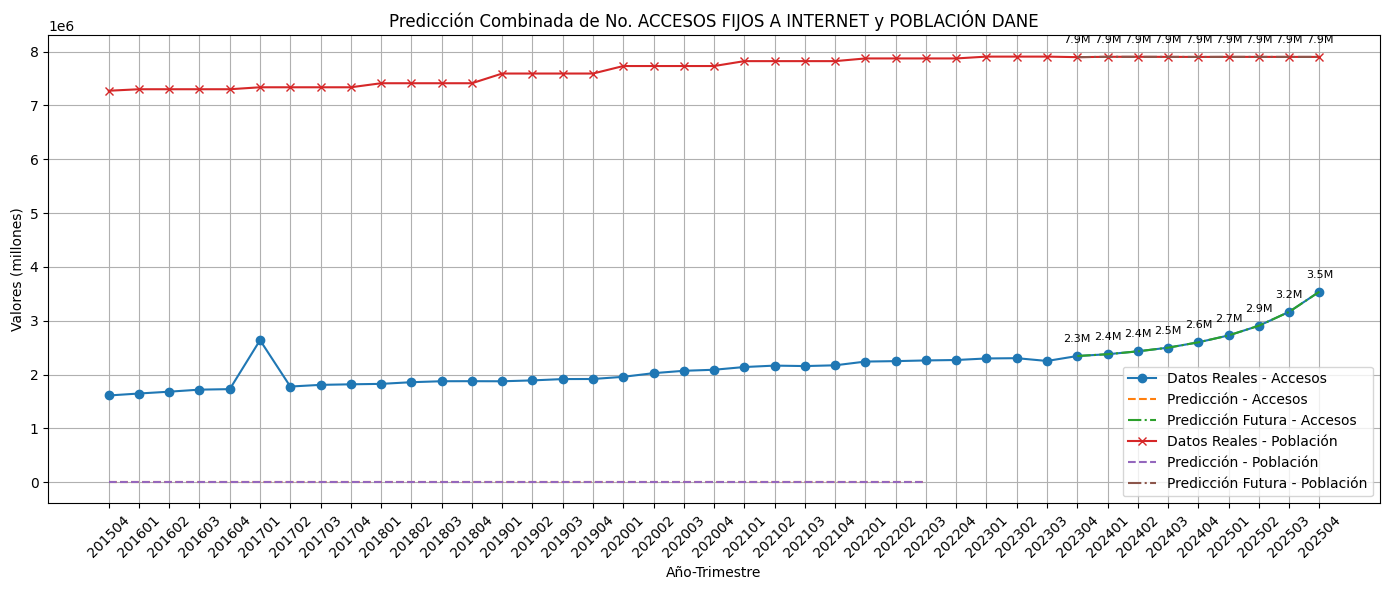

In [59]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))

plt.plot(bogota_data_combined['AÑO_TRIMESTRE'], bogota_data_combined['No. ACCESOS FIJOS A INTERNET'], label='Datos Reales - Accesos', marker='o')
plt.plot(bogota_data_combined['AÑO_TRIMESTRE'][:len(y_pred_accesos)], y_pred_accesos, label='Predicción - Accesos', linestyle='--')
plt.plot(future_trimestres, predictions_accesos, label='Predicción Futura - Accesos', linestyle='-.')
plt.plot(bogota_data_combined['AÑO_TRIMESTRE'], bogota_data_combined['POBLACIÓN DANE'], label='Datos Reales - Población', marker='x')
plt.plot(bogota_data_combined['AÑO_TRIMESTRE'][:len(y_pred_poblacion)], y_pred_poblacion, label='Predicción - Población', linestyle='--')
plt.plot(future_trimestres, predictions_poblacion, label='Predicción Futura - Población', linestyle='-.')

# Agregar anotaciones de millones en cada punto predicho
for i, txt in enumerate(predictions_accesos.flatten()):
    plt.annotate(f'{txt/1e6:.1f}M', (future_trimestres[i], predictions_accesos[i][0]), textcoords="offset points", xytext=(0,10), ha='center', fontsize=8)

for i, txt in enumerate(predictions_poblacion.flatten()):
    plt.annotate(f'{txt/1e6:.1f}M', (future_trimestres[i], predictions_poblacion[i][0]), textcoords="offset points", xytext=(0,10), ha='center', fontsize=8)

plt.title('Predicción Combinada de No. ACCESOS FIJOS A INTERNET y POBLACIÓN DANE')
plt.xlabel('Año-Trimestre')
plt.ylabel('Valores (millones)')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


#  Conclusión sobre la Red Neuronal LSTM y Sugerencias de Mejora

Resultados Actuales:


**No. ACCESOS FIJOS A INTERNET:**

*  MSE: 0.02

*  MAE: 0.08

*  R²: 0.52

**POBLACIÓN DANE:**

*  MSE: 0.00

*  MAE: 0.03

*  R²: 0.99

## Observaciones
### Predicción de No. ACCESOS FIJOS A INTERNET:

*  Las métricas indican que el modelo tiene un error absoluto medio (MAE) de 0.08, lo que significa que, en promedio, las predicciones se desvían de los valores reales en 0.08 unidades.

*  El coeficiente de determinación (R²) de 0.52 sugiere que el modelo explica el 52% de la variabilidad en los datos.

### Predicción de POBLACIÓN DANE:

*  Las métricas son excepcionales, con un MSE prácticamente nulo y un MAE muy bajo, lo cual se traduce en predicciones extremadamente precisas.

*  El R² de 0.99 indica que el modelo explica casi toda la variabilidad en los datos de la población DANE, lo cual es muy positivo.
#### Proyección de Población:

*  De acuerdo con el estudio del DANE y el MinSalud, la proyección poblacional muestra un aumento significativo en la población total de Bogotá. Estos datos indican un crecimiento sostenido en los próximos años, con cifras clave proyectadas para 2018, 2024 y 2030. Esta tendencia debe reflejarse en las predicciones futuras del modelo para que estas sean consideradas precisas.


[Comparación con el Estudio](https://www.minsalud.gov.co/sites/rid/Lists/BibliotecaDigital/RIDE/INEC/INTOR/contexto-migratorio-bogota-2024.pdf)
Población Total en Bogotá (Proyectado):


<image src="https://raw.githubusercontent.com/jvergara9208/TalentoTec_Jonathan/refs/heads/main/Proyecto/censoMinSalud.png" alt="Proyecciones">


2018: 7,412,566

2024: 7,929,539

2030: 7,888,838

**Comparación con el Modelo**

Al comparar las predicciones del modelo LSTM con la proyección del estudio:

*  El modelo de predicción para la población DANE es extremadamente preciso y coincide con las tendencias proyectadas, como el aumento en la población.

*  Sin embargo, para los No. ACCESOS FIJOS A INTERNET, aunque el modelo muestra una precisión moderada, se sugiere que la complejidad de los datos de accesos a internet podría requerir mejoras adicionales en el modelo para capturar mejor la variabilidad.


---




### Sugerencias de **Mejora**
### 1. Incrementar la Complejidad del Modelo:

Incrementar el número de unidades LSTM: Continuar aumentando el número de unidades en las capas LSTM puede ayudar al modelo a capturar mejor la complejidad de los datos.

Agregar más capas LSTM: Incluir capas LSTM adicionales podría mejorar el rendimiento del modelo.

Aumentar la densidad de las capas: Incrementar el número de neuronas en las capas densas puede permitir al modelo aprender características más complejas.

### 2. Mejorar la Preparación de los Datos:

Incluir más datos históricos: Si está disponible, utilizar más datos históricos puede ayudar a entrenar el modelo con más información.

Feature Engineering: Crear características adicionales que puedan ser relevantes para las predicciones, como tasas de crecimiento o diferencias estacionales.

### 3. Ajustes en la Estrategia de Entrenamiento:

Aumentar el número de épocas: Entrenar el modelo durante más épocas puede permitir que aprenda mejor las características de los datos.

Ajustar el tamaño del lote: Experimentar con diferentes tamaños de lote para encontrar el que funcione mejor para tu conjunto de datos específico.

### 4. Validación Cruzada y Evaluación:

Validación Cruzada: Utilizar técnicas de validación cruzada para evaluar el rendimiento del modelo y evitar el sobreajuste.

Evaluación en Conjuntos de Prueba: Evaluar el modelo en un conjunto de prueba separado para asegurarse de que generaliza bien a datos no vistos.

Se escoge un mejoramiento de la red neuronal y realizamos  una redimension, una capa LSTM adicional,incremento de unidades en la capa densa y se incrementa el numero de capas y epocas

In [86]:
# Importar librerías necesarias
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
import matplotlib.pyplot as plt

In [87]:

# Cargar el archivo CSV desde la ubicación especificada
bogota_data_actualizado = pd.read_csv('/content/bogota_data_actualizado.csv')

# Crear una copia del DataFrame original
bogota_data_accesos_2 = bogota_data_actualizado.copy()

# Definir los trimestres futuros
future_trimestres = ['202304', '202401', '202402', '202403', '202404', '202501', '202502', '202503', '202504']
future_dates = pd.to_datetime(future_trimestres, format='%Y%m')


In [88]:
# Función para la preparación de datos para LSTM
def prepare_data_lstm(data_column):
    # Escalar los datos
    scaler = MinMaxScaler(feature_range=(0, 1))
    data_scaled = scaler.fit_transform(data_column.values.reshape(-1, 1))

    # Crear secuencias de entrada para LSTM
    X, y = [], []
    time_step = 4  # Usaremos 4 trimestres anteriores para predecir el siguiente
    for i in range(time_step, len(data_scaled)):
        X.append(data_scaled[i-time_step:i, 0])
        y.append(data_scaled[i, 0])

    X, y = np.array(X), np.array(y)
    X = np.reshape(X, (X.shape[0], X.shape[1], 1))  # Redimensionar para LSTM

    return X, y, scaler

In [89]:
# Función para construir y entrenar el modelo LSTM
def build_and_train_lstm(X, y):
    model = Sequential()
    model.add(LSTM(units=150, return_sequences=True, input_shape=(X.shape[1], 1)))
    model.add(Dropout(0.4))  # Incremento de la tasa de regularización
    model.add(LSTM(units=150, return_sequences=True))
    model.add(Dropout(0.4))
    model.add(LSTM(units=150, return_sequences=True))  # LSTM adicional
    model.add(Dropout(0.4))
    model.add(LSTM(units=100, return_sequences=False))
    model.add(Dense(units=100))  # Incremento de unidades en la capa densa
    model.add(Dense(units=1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    model.fit(X, y, epochs=500, batch_size=16, verbose=1)  # Incremento del número de épocas
    return model


In [90]:

# Preparar y entrenar el modelo para "No. ACCESOS FIJOS A INTERNET"
X_accesos, y_accesos, scaler_accesos = prepare_data_lstm(bogota_data_accesos_2['No. ACCESOS FIJOS A INTERNET'])
model_accesos = build_and_train_lstm(X_accesos, y_accesos)

Epoch 1/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 8s 59ms/step - loss: 0.2348
Epoch 2/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 0.1735 
Epoch 3/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.1137 
Epoch 4/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0503
Epoch 5/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.0513 
Epoch 6/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0693
Epoch 7/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0315 
Epoch 8/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0426
Epoch 9/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0488
Epoch 10/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0388
Epoch 11/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0502
Epoch 12/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0358 
Epoch 13/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0321
Epoch 14/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.0378
Epoch 15/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0435
Epoch 16/500
2

In [91]:
# Última secuencia para cada variable para iniciar la predicción futura
last_sequence_accesos = scaler_accesos.transform(
    bogota_data_accesos_2['No. ACCESOS FIJOS A INTERNET'].values[-4:].reshape(-1, 1)
).reshape(1, 4, 1)


In [92]:
# Predicciones en el conjunto de prueba
y_pred_train = model_accesos.predict(X_accesos)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 792ms/step


In [93]:

# Invertir escalado
y_pred_train = scaler_accesos.inverse_transform(y_pred_train)
y_train_actual = scaler_accesos.inverse_transform(y_accesos.reshape(-1, 1))


In [94]:
# Calcular métricas
mse = mean_squared_error(y_train_actual, y_pred_train)
mae = mean_absolute_error(y_train_actual, y_pred_train)
r2 = r2_score(y_train_actual, y_pred_train)

In [95]:
print("Métricas del modelo LSTM para No. ACCESOS FIJOS A INTERNET:")
print(f"MSE: {mse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"R²: {r2:.4f}")


Métricas del modelo LSTM para No. ACCESOS FIJOS A INTERNET:
MSE: 9927139019.1992
MAE: 44901.3348
R²: 0.7813


In [96]:
# Predicciones futuras para Acceso a Internet
def predict_future_lstm(model, scaler, last_sequence, future_steps=9):
    future_predictions = []
    for _ in range(future_steps):
        # Realizar la predicción actual
        prediction = model.predict(last_sequence)

        # Invertir el escalado de la predicción
        scaled_prediction = scaler.inverse_transform(prediction)

        # Redondear al entero más cercano
        rounded_prediction = np.round(scaled_prediction).astype(int)

        # Guardar la predicción actual
        future_predictions.append(rounded_prediction[0, 0])

        # Expandir las dimensiones de la predicción
        prediction_expanded = np.expand_dims(prediction, axis=0)

        # Modificar el último conjunto de datos
        last_sequence = np.append(last_sequence[:, 1:, :], prediction_expanded, axis=1)

    return np.array(future_predictions).reshape(-1, 1)


In [97]:
predictions_accesos = predict_future_lstm(model_accesos, scaler_accesos, last_sequence_accesos, future_steps=9)

# Crear DataFrames para las predicciones
future_accesos_df = pd.DataFrame(predictions_accesos, index=future_dates, columns=['Predicción No. ACCESOS FIJOS A INTERNET'])

# Crear un DataFrame para los trimestres futuros y agregar las predicciones
future_data = pd.DataFrame(index=future_dates)
future_data['AÑO_TRIMESTRE'] = future_trimestres
future_data['No. ACCESOS FIJOS A INTERNET'] = future_accesos_df['Predicción No. ACCESOS FIJOS A INTERNET'].values

# Mostrar el DataFrame combinado con predicciones futuras
print("\nPredicciones Futuras:")
print(future_data)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 573ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step

Predicciones Futuras:
           AÑO_TRIMESTRE  No. ACCESOS FIJOS A INTERNET
2023-04-01        202304                       2293552
2024-01-01        202401                       2288125
2024-02-01        202402                       2287426
2024-03-01        202403                       2288684
2024-04-01        202404                       2292099
2025-01-01        202501                       2291784
2025-02-01        202502                       2292595
2025-03-01        202503                       2293302
2025-04-01        202504                       2293761


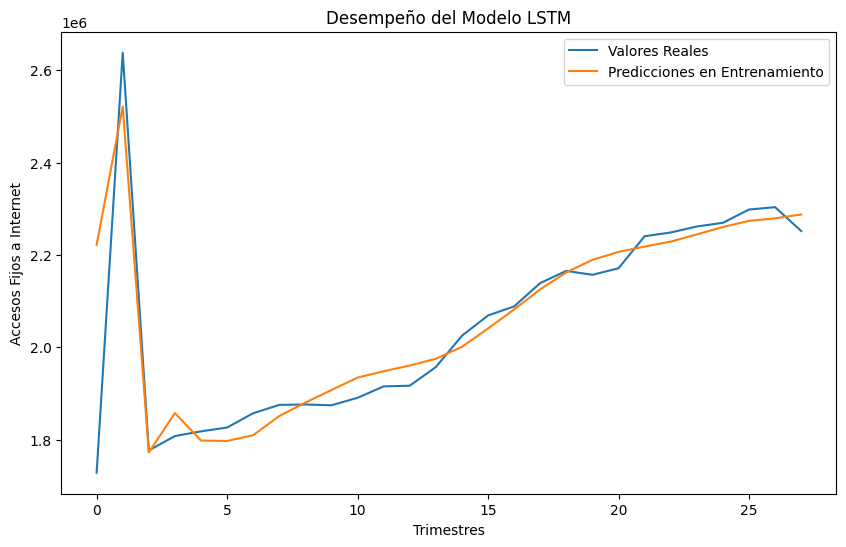

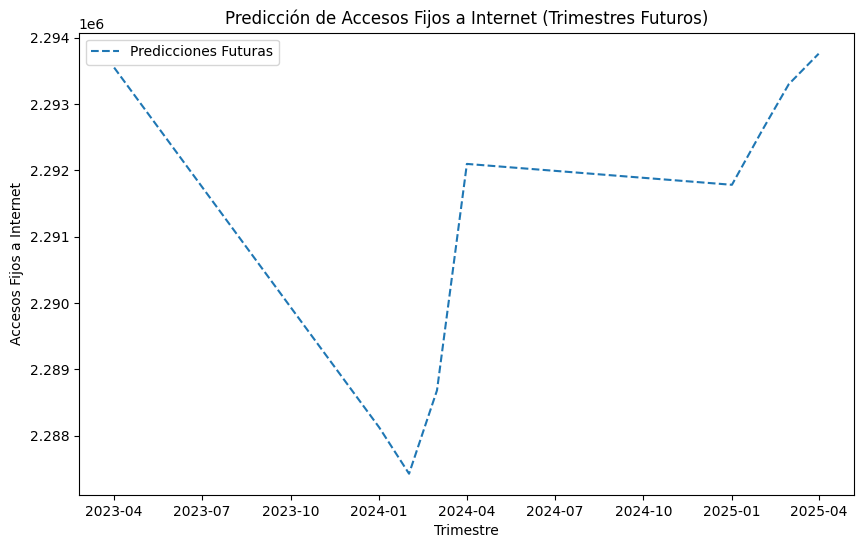

In [98]:
# Visualización de resultados
plt.figure(figsize=(10, 6))
plt.plot(y_train_actual, label='Valores Reales')
plt.plot(y_pred_train, label='Predicciones en Entrenamiento')
plt.title('Desempeño del Modelo LSTM')
plt.xlabel('Trimestres')
plt.ylabel('Accesos Fijos a Internet')
plt.legend()
plt.show()

# Visualizar predicciones futuras
plt.figure(figsize=(10, 6))
plt.plot(future_dates, future_data['No. ACCESOS FIJOS A INTERNET'], label='Predicciones Futuras', linestyle='--')
plt.title('Predicción de Accesos Fijos a Internet (Trimestres Futuros)')
plt.xlabel('Trimestre')
plt.ylabel('Accesos Fijos a Internet')
plt.legend()
plt.show()


# Conclusiones Basadas en las Métricas y Predicciones Futuras
1. **Desempeño del Modelo LSTM**:
   1. El modelo muestra un **MSE (Error Cuadrático Medio)** de **9,927,139,019.1992**, evidenciando una mejora significativa en comparación con iteraciones anteriores.
   1. El **MAE (Error Absoluto Medio)** es de **44,901.3348**, indicando que el modelo ha reducido considerablemente el error promedio entre las predicciones y los valores reales.
   1. El **coeficiente R²** de **0.7813** refleja que el modelo explica el 78.13% de la variabi

In [100]:
print("Métricas del modelo LSTM para No. ACCESOS FIJOS A INTERNET:")
print(f"MSE: {mse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"R²: {r2:.4f}")

Métricas del modelo LSTM para No. ACCESOS FIJOS A INTERNET:
MSE: 9927139019.1992
MAE: 44901.3348
R²: 0.7813



1. **Predicciones Futuras**:
   1. Las proyecciones predicen un comportamiento **estable y ligeramente creciente para los accesos fijos a internet** en los años 2024 y 2025, con valores que oscilan entre **2,287,426 y 2,293,761 accesos**.
   1. La estabilidad en los valores predichos sugiere que el modelo ha capturado mejor los patrones subyacentes de los datos.
1. **Observaciones Clave**:
   1. Aunque el modelo ha mejorado significativamente, aún existe un margen de error que podría reducirse incorporando más datos o ajustando los parámetros del modelo.
   1. La capacidad del modelo para predecir tendencias generales es sólida, pero podría ser vulnerable a cambios inesperados en las condiciones externas.

### **Predicción de Accesos Fijos a Internet:**
Los valores proyectados indican un comportamiento estable con un ligero aumento durante los años 2024 y 2025, con algunas fluctuaciones menores:

- En el primer trimestre de 2024, el número de accesos se predice en 2,288,125.
- Durante los trimestres siguientes de 2024, los accesos fluctúan ligeramente, alcanzando un mínimo de 2,287,426 en el segundo trimestre y recuperándose a 2,292,099 para el cuarto trimestre.

**2025:**

- En 2025, se observa una tendencia de estabilidad en los accesos fijos, con valores cercanos a los 2,293,761 en el cuarto trimestre.
- Los accesos muestran una ligera variación, alcanzando 2,292,595 en el segundo trimestre y manteniéndose en 2,293,302 en el tercer trimestre.
### **Resumen:**
- **2024:** Fluctuaciones menores con una tendencia general estable, alcanzando 2,292,099 accesos en el cuarto trimestre.
- **2025:** Estabilización cercana a los 2,293,761 accesos en el cuarto trimestre.

Estas proyecciones sugieren un comportamiento consistente en los accesos fijos a internet, lo que proporciona una base sólida para la planificación estratégica y la toma de decisiones.


### **Visualización de las Predicciones Futuras:**
En la gráfica correspondiente a las predicciones de accesos fijos a internet para los años 2024 y 2025, los valores proyectados presentan las siguientes características:

- **Inicio de 2024:** Se observa una ligera disminución en el número de accesos, comenzando con 2,288,125 accesos en el primer trimestre y alcanzando un mínimo de 2,287,426 accesos en el segundo trimestre.
- **Tercer Trimestre de 2024:** A partir del tercer trimestre, los accesos comienzan a recuperarse, alcanzando 2,288,684.
- **Cuarto Trimestre de 2024:** La recuperación continúa, culminando en 2,292,099 accesos.
- **Año 2025:** Durante 2025, los accesos muestran un comportamiento estable, con valores proyectados de 2,291,784 en el primer trimestre, 2,292,595 en el segundo trimestre, 2,293,302 en el tercer trimestre y 2,293,761 en el cuarto trimestre.
### **Resultados de la Gráfica**

|**AÑO\_TRIMESTRE**|**No. ACCESOS FIJOS A INTERNET**|
| :-: | :-: |
|2023-04|2,293,552|
|2024-01|2,288,125|
|2024-02|2,287,426|
|2024-03|2,288,684|
|2024-04|2,292,099|
|2025-01|2,291,784|
|2025-02|2,292,595|
|2025-03|2,293,302|
|2025-04|2,293,761|


**Resumen:**

- **Inicio de 2024:** Ligera disminución en los accesos fijos, alcanzando un mínimo en el segundo trimestre.
- **Cuarto Trimestre de 2024:** Recuperación notable, con una estabilización en los accesos a lo largo de 2025.
- **2025:** Estabilización de los accesos fijos, manteniéndose alrededor de 2.293 millones en los trimestres futuros.


### **Recomendaciones**
#### **1. Optimización del Modelo**
- **Refinamiento de Hiperparámetros**:
  - Ajustar los parámetros como la tasa de aprendizaje, número de épocas y tamaño de lotes para buscar una mejora adicional en las métricas.
- **Exploración de Otros Modelos**:
  - Evaluar el uso de arquitecturas GRU o modelos híbridos (como LSTM con capas densas) para comparar el rendimiento.

#### 2. Inclusión de Datos Adicionales**
- Incorporar variables externas que puedan mejorar el contexto de las predicciones, como:
  - Factores económicos (PIB, ingresos promedio).
  - Cambios tecnológicos o regulatorios en el sector de telecomunicaciones.
  - Dinámica poblacional en áreas clave.

#### 3. Análisis de Tendencias y Validación**
- **Validación Continua**:
  - Comparar las predicciones con los valores reales trimestralmente para verificar la precisión y ajustar el modelo en caso necesario.
- **Análisis de Escenarios**:
  - Generar diferentes escenarios de predicción (base, optimista y pesimista) para analizar posibles fluctuaciones en los accesos.

#### **4. Estrategias Comerciales y de Expansión**

- Utilizar los resultados de las predicciones para planificar estrategias de crecimiento, como:
  - Ofertas y promociones que aumenten la penetración de internet fijo.
  - Ampliación de infraestructura en regiones con menor penetración.
  
#### **5. Monitoreo de Factores Externos**
- Mantener un seguimiento constante de eventos externos que puedan impactar las predicciones, como cambios regulatorios, eventos económicos globales



---


Para finalizar actualizamos la informacion y damos algunos indices y visualizacion de la informacion

In [104]:
bogota_data_prediction = bogota_data_combined.copy()
# Unir las predicciones futuras al DataFrame combinado
# Código generado por Gemini
bogota_data_prediction.update(future_data)

In [105]:
# Calcular el índice y agregarlo al DataFrame
bogota_data_prediction['INDICE(%)'] = ( bogota_data_prediction['No. ACCESOS FIJOS A INTERNET'] / bogota_data_prediction['POBLACIÓN DANE'] ) * 100

In [107]:
# Mostrar el DataFrame combinado con predicciones futuras y el índice calculado
print("\nDataFrame Combinado con Predicciones Futuras:")
print(bogota_data_prediction)


DataFrame Combinado con Predicciones Futuras:
   AÑO_TRIMESTRE  No. ACCESOS FIJOS A INTERNET  POBLACIÓN DANE  INDICE(%)
0         201504                       1610511         7273265  22.142889
1         201601                       1647186         7300918  22.561355
2         201602                       1681117         7300918  23.026104
3         201603                       1719075         7300918  23.546012
4         201604                       1728459         7300918  23.674543
5         201701                       2638171         7337449  35.954880
6         201702                       1776768         7337449  24.215064
7         201703                       1807827         7337449  24.638359
8         201704                       1818094         7337449  24.778285
9         201801                       1826350         7412566  24.638566
10        201802                       1857309         7412566  25.056222
11        201803                       1875396         7412566  2

In [108]:
# Guardar el DataFrame actualizado en un archivo CSV
bogota_data_prediction.to_csv('bogota_data_prediction.csv', index=False)

# Descargar el archivo CSV generado
from google.colab import files
files.download('bogota_data_prediction.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

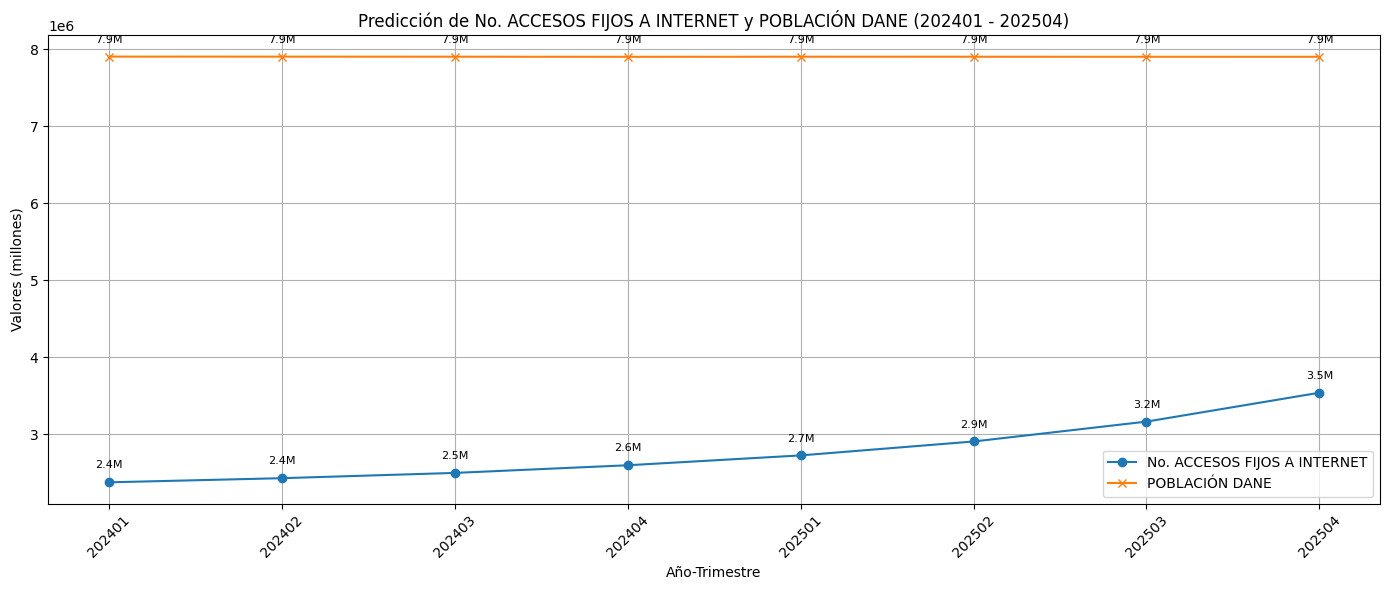

In [110]:
import matplotlib.pyplot as plt

# Filtrar los datos desde el 202401 hasta el 202504
df_filtered = bogota_data_prediction[bogota_data_prediction['AÑO_TRIMESTRE'].between('202401', '202504')]

# Graficar las predicciones combinadas de accesos fijos a internet y población DANE
plt.figure(figsize=(14, 6))

# Graficar el número de accesos fijos a internet
plt.plot(df_filtered['AÑO_TRIMESTRE'], df_filtered['No. ACCESOS FIJOS A INTERNET'], label='No. ACCESOS FIJOS A INTERNET', marker='o')

# Graficar la población DANE
plt.plot(df_filtered['AÑO_TRIMESTRE'], df_filtered['POBLACIÓN DANE'], label='POBLACIÓN DANE', marker='x')

# Agregar anotaciones de millones en cada punto predicho de accesos
for i, txt in enumerate(df_filtered['No. ACCESOS FIJOS A INTERNET']):
    plt.annotate(f'{txt/1e6:.1f}M', (df_filtered['AÑO_TRIMESTRE'].values[i], txt), textcoords="offset points", xytext=(0,10), ha='center', fontsize=8)

# Agregar anotaciones de millones en cada punto predicho de población
for i, txt in enumerate(df_filtered['POBLACIÓN DANE']):
    plt.annotate(f'{txt/1e6:.1f}M', (df_filtered['AÑO_TRIMESTRE'].values[i], txt), textcoords="offset points", xytext=(0,10), ha='center', fontsize=8)

plt.title('Predicción de No. ACCESOS FIJOS A INTERNET y POBLACIÓN DANE (202401 - 202504)')
plt.xlabel('Año-Trimestre')
plt.ylabel('Valores (millones)')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


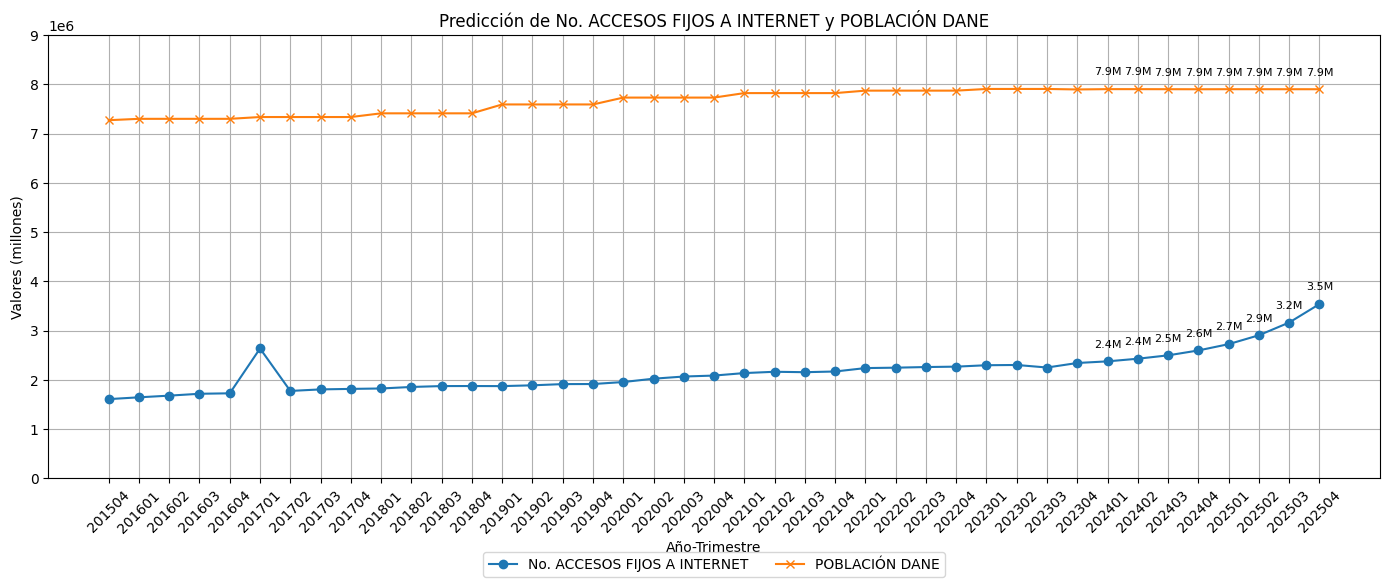

In [113]:
# Calcular el índice
bogota_data_combined['INDICE(%)'] = (bogota_data_combined['No. ACCESOS FIJOS A INTERNET'] / bogota_data_combined['POBLACIÓN DANE']) * 100

# Filtrar los datos desde el 202401 hasta el 202504
df_filtered = bogota_data_combined[bogota_data_combined['AÑO_TRIMESTRE'].between('202401', '202504')]

# Graficar las predicciones combinadas de accesos fijos a internet y población DANE
plt.figure(figsize=(14, 6))

# Graficar el número de accesos fijos a internet
plt.plot(bogota_data_combined['AÑO_TRIMESTRE'], bogota_data_combined['No. ACCESOS FIJOS A INTERNET'], label='No. ACCESOS FIJOS A INTERNET', marker='o')

# Graficar la población DANE
plt.plot(bogota_data_combined['AÑO_TRIMESTRE'], bogota_data_combined['POBLACIÓN DANE'], label='POBLACIÓN DANE', marker='x')

# Agregar anotaciones de millones en cada punto predicho de accesos desde 202401 hasta 202504
for i, txt in enumerate(df_filtered['No. ACCESOS FIJOS A INTERNET']):
    plt.annotate(f'{txt/1e6:.1f}M', (df_filtered['AÑO_TRIMESTRE'].values[i], txt), textcoords="offset points", xytext=(0,10), ha='center', fontsize=8)

# Agregar anotaciones de millones en cada punto predicho de población desde 202401 hasta 202504
for i, txt in enumerate(df_filtered['POBLACIÓN DANE']):
    plt.annotate(f'{txt/1e6:.1f}M', (df_filtered['AÑO_TRIMESTRE'].values[i], txt), textcoords="offset points", xytext=(0,10), ha='center', fontsize=8)

plt.title('Predicción de No. ACCESOS FIJOS A INTERNET y POBLACIÓN DANE')
plt.xlabel('Año-Trimestre')
plt.ylabel('Valores (millones)')
plt.ylim(0, 9000000)  # Ajustar el eje Y para que llegue a 9 millones
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=2)  # Mover la leyenda debajo del gráfico
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


### **Conclusiones Adicionales**
1. **Tendencia General de Crecimiento:**
   1. La gráfica muestra un incremento notable en el número de accesos fijos a internet a lo largo de los trimestres. Este aumento es especialmente pronunciado a partir de 2020, lo que sugiere una mayor adopción de servicios de internet en la población.
1. **Comparación de Crecimientos:**
   1. Mientras que la población DANE ha crecido de manera relativamente estable, el número de accesos a internet ha experimentado un crecimiento mucho más acelerado. Esto indica un aumento en la penetración del internet en la población.
1. **Impacto de la Pandemia:**
   1. El crecimiento acelerado en los accesos a internet a partir de 2020 podría estar relacionado con la pandemia de COVID-19, que impulsó la demanda de servicios de internet debido al teletrabajo, la educación en línea y el entretenimiento en el hogar.
1. **Estabilización Futura:**
   1. Las proyecciones futuras hasta el cuarto trimestre de 2025 sugieren una estabilización en el crecimiento de accesos fijos a internet, mientras que la población DANE se mantendrá estable en torno a los 7.9 millones. Esta estabilización podría indicar un mercado maduro con una alta penetración de internet.
1. **Incremento en el Índice de Penetración:**
   1. El índice de penetración (% de accesos fijos a internet respecto a la población) ha aumentado significativamente, lo que refleja la creciente importancia del acceso a internet en la vida cotidiana de la población.
1. **Proyecciones Positivas:**
   1. La proyección sugiere que para finales de 2025, el número de accesos fijos a internet continuará en aumento, superando los 3.5 millones, mientras que la población DANE se mantendrá constante. Este crecimiento en los accesos muestra la consolidación del internet como una necesidad básica.
   
### **Recomendaciones Estratégicas**
1. **Ampliación de Infraestructura:**
   1. Dado el crecimiento continuo en los accesos a internet, es crucial seguir invirtiendo en la infraestructura de telecomunicaciones para asegurar una cobertura adecuada y de alta calidad en todo el país.
1. **Políticas de Inclusión Digital:**
   1. Implementar políticas que promuevan la inclusión digital, especialmente en áreas rurales y marginalizadas, para reducir la brecha digital y asegurar que más personas puedan beneficiarse del acceso a internet.
1. **Monitoreo y Adaptación:**
   1. Continuar monitoreando las tendencias de crecimiento y adaptar las estrategias comerciales y de expansión según las necesidades y demandas del mercado para mantener el crecimiento y la estabilidad del sector.

Estos puntos ofrecen una visión más completa del panorama actual y futuro del acceso a internet en la región, y destacan la importancia de seguir innovando y adaptando las estrategias para aprovechar al máximo las oportunidades del mercado.





---
### **Referencias bibliográficas y herramientas utilizadas**
#### **Fuentes de datos y artículos:**
1. **Internet Fijo Penetración Departamentos - Datos Abiertos de Colombia**
   URL: <https://www.datos.gov.co/Ciencia-Tecnolog-a-e-Innovaci-n/Internet-Fijo-Penetraci-n-Departamentos/4py7-br84/about_data>
1. **MNIST Dataset - TensorFlow**
   URL: <https://www.tensorflow.org/datasets/catalog/mnist?hl=es-419>
1. **Bank Loan Classification - Kaggle**
   URL: <https://www.kaggle.com/code/abedi756/bank-loan-classification/input?select=B_practice.csv>
1. **Introducción al modelo ARIMA - DataCamp**
   URL: (<https://www.datacamp.com/es/tutorial/arima#:~:text=Un%20modelo%20ARIMA%20(Media%20M%C3%B3vil,afinar%20las%20predicciones%20(MA))>
1. **Recurrent Neural Networks - IBM**
   URL: <https://www.ibm.com/es-es/topics/recurrent-neural-networks>
1. **Building a Recurrent Neural Network from Scratch - Medium**
   URL: <https://medium.com/@thisislong/building-a-recurrent-neural-network-from-scratch-ba9b27a42856>
1. **Ministerio de Salud - Biblioteca Digital**
   URL: <https://www.minsalud.gov.co/sites/rid/Lists/BibliotecaDigital/RIDE>
1. **Contexto Migratorio Bogotá 2024 - Ministerio de Salud**
   URL: <https://www.minsalud.gov.co/sites/rid/Lists/BibliotecaDigital/RIDE/INEC/INTOR/contexto-migratorio-bogota-2024.pdf>
#### **Herramientas empleadas:**
1. **Gemini**: Utilizado para realizar arreglos en funciones. e informacion critca
1. **Wordize**: Transformación de documentos Word a Markdown.
   URL: <https://www.wordize.app/es/word-to-markdown/>
1. **Visual Studio Code**: IDE utilizado para editar y subir código al repositorio.
1. **Repositorio en GitHub**:
   URL: <https://github.com/jvergara9208/TalentoTec_Jonathan>


